In [1]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import seaborn as sns
from itertools import compress
import os
from datetime import datetime
from calfews_src import *
from calfews_src.util import *
# from calfews_src.visualizer import Visualizer

### FKC capacity constraints

In [2]:
# datDaily = get_results_sensitivity_number_outside_model('results/wy2017/results.hdf5', '')
# keys = list(datDaily.keys())


In [3]:
# [s for s in keys if s.split('_')[0]=='lowertule']

In [4]:
# flow = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
# nodes = [k.split('_')[1] for k in flow]
# turnout = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']

In [5]:
# plt.figure()
# for k in flow:
#     plt.plot(datDaily[k], label=k)
# plt.legend()

In [6]:
# flowfrac = np.zeros((datDaily.shape[0], len(flow)))
# flowtot = np.zeros((datDaily.shape[0], len(flow)))
# for i,k in enumerate(flow):
#     flowfrac[:, -(1+i)] = datDaily[k] / datDaily[k].max()
#     flowtot[:, -(i+1)] = datDaily[k]
# flowfrac = flowfrac.transpose()
# flowtot = flowtot.transpose()

# tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
# tonode = np.zeros((datDaily.shape[0], len(turnout)))    
# for i,k in enumerate(turnout):
#     tofrac[:, -(i+1)] = datDaily[k] / datDaily[k].max()
#     tonode[:, -(i+1)] = datDaily[k]
# tofrac = tofrac.transpose()
# tonode = tonode.transpose()

# totot = np.zeros((datDaily.shape[0]))    
# for i,k in enumerate(turnout):
#     totot[:] += datDaily[k]

In [7]:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(14,18), sharex=True)
# ax1.plot((datDaily['fkc_COF_flow'] + datDaily['fkc_COF_turnout']).values)
# ax1.set_ylabel('Flow from MIL (tAF)')

# m = ax2.pcolormesh(flowtot)
# a = ax2.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax2)
# cb.set_label('Flow (tAF)')

# m = ax3.pcolormesh(flowfrac)
# a = ax3.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax3)
# cb.set_label('Flow capacity fraction')


# ax4.plot(totot)
# ax4.set_ylabel('Total FKC turnout (tAF)')

# m = ax5.pcolormesh(tonode)
# a = ax5.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax5)
# cb.set_label('Turnout at node (tAF)')

# m = ax6.pcolormesh(tofrac)
# a = ax6.set_xlabel('Date')
# a = ax6.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax6)
# cb.set_label('Turnout capacity fraction')

In [8]:
# fkc_capacity = np.array([5217.0, 5217.0, 5217.0, 5217.0, 3797.0, 3887.0, 3887.0, 4196.0, 4196.0, 3427.0, 3427.0, 3427.0, 4060.0, 4060.0, 4060.0, 4060.0, 2921.0, 2921.0, 2921.0, 2921.0, 2921.0, 1625.0, 1625.0, 1625.0, 1893.0, 1893.0, 1893.0, 1897.0, 1897.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
# # fkc_capacity = np.array([5300.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
# fkc_node = ["MIL","FRS","COF","KGR","OFK","TUL","KWD","OKW","KWR","EXE","LDS","LND","PRT","LWT","OTL","TLR","TPD","SAU","TBA","OXV","PIX","DLE","KRT","SSJ","SFW","NKN","NKB","XVC","KNR","AEC","none"]
# fkc_turnout = [0.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0]
# # print(len(fkc_capacity), len(fkc_node), len(fkc_turnout))
# fkc_capacity = fkc_capacity[1:-1]


In [9]:
# plt.figure(figsize=(14,10))
# for i,k in enumerate(nodes):
#     flow = datDaily['fkc_'+k+'_flow']
#     plt.scatter(np.ones(flowtot.shape[1])*i, flow.values, alpha=0.1, c='b')
# plt.plot(fkc_capacity, lw=3, c='k')

In [10]:
# flowfrac = np.zeros((datDaily.shape[0], len(flow)))
# flowtot = np.zeros((datDaily.shape[0], len(flow)))
# for i,k in enumerate(flow):
#     flowfrac[:, i] = datDaily[k] / datDaily[k].max()
#     flowtot[:, i] = datDaily[k]
# flowfrac = flowfrac.transpose()
# flowtot = flowtot.transpose()

# tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
# tonode = np.zeros((datDaily.shape[0], len(turnout)))    
# for i,k in enumerate(turnout):
#     tofrac[:, i] = datDaily[k] / datDaily[k].max()
#     tonode[:, i] = datDaily[k]
# tofrac = tofrac.transpose()
# tonode = tonode.transpose()

# totot = np.zeros((datDaily.shape[0]))    
# for i,k in enumerate(turnout):
#     totot[:] += datDaily[k]

In [11]:
# fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True)
# cmap = cm.get_cmap('hsv')
# norm = colors.Normalize(vmin=0, vmax=365)

# for t in range(365):
#     col = (t%365)/365
#     ax1.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
# ax1.plot(fkc_capacity, lw=3, c='k')

# for t in range(365, flowtot.shape[1]):
#     col = (t%365)/365
#     ax2.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
# ax2.plot(fkc_capacity, lw=3, c='k')

# cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
# cb1.set_label('Day of water year')

In [12]:
# fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True, sharey=True)
# cmap = cm.get_cmap('hsv')
# norm = colors.Normalize(vmin=0, vmax=365)

# for t in range(365):
#     col = (t%365)/365
#     ax1.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# # ax1.plot(fkc_capacity, lw=3, c='k')

# for t in range(365, flowtot.shape[1]):
#     col = (t%365)/365
#     ax2.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# # ax2.plot(fkc_capacity, lw=3, c='k')

# cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
# cb1.set_label('Day of water year')

## compare fkc ownership scenarios

In [13]:
# dat = {}
# dat['NoRehab'] = get_results_sensitivity_number_outside_model('results/new_noRehab/results.hdf5', '')
# dat['NoOwn'] = get_results_sensitivity_number_outside_model('results/FKC_rehab_ownership_LWT/results.hdf5', '')
# dat['WithOwn'] = get_results_sensitivity_number_outside_model('results/FKC_rehab_ownership_LWT_PIX_DLE_SSJ/results.hdf5', '')
# keys = {}
# keys['NoRehab'] = list(dat['NoRehab'].keys())
# keys['NoOwn'] = list(dat['NoOwn'].keys())
# keys['WithOwn'] = list(dat['WithOwn'].keys())


In [14]:
# [len(l) for l in keys.values()]

In [15]:
# flow = {}
# nodes = {}
# turnout = {}
# for k in ['NoRehab', 'NoOwn', 'WithOwn']:
#     flow[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
#     nodes[k] = [k.split('_')[1] for k in flow[k]]
#     turnout[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']
# # flow

In [16]:
# # plt.figure()
# # for k in flow:
# #     plt.plot(datDaily[k], label=k)
# # plt.legend()
# l = 'fkc_SFW_turnout'
# plt.figure(figsize=(10,14))
# for k in ['WithOwn']:#, 'WithOwn']:
#     print(k)
#     plt.scatter(dat['NoOwn'][l], dat[k][l], alpha=0.4, label=k)

# plt.plot([0,dat[k][l].max()],[0,dat[k][l].max()],c='k')
# plt.legend()

In [17]:
# d = 'metropolitan_SOC_ARV_recharged'
# print(dat['NoRehab'][d].sum(), dat['NoOwn'][d].sum(), dat['WithOwn'][d].sum())

In [18]:
# [s for s in keys['WithOwn'] if 'SOC' in s.split('_')]# and s.split('_')[2]=='flow']


In [19]:
# plt.plot(dat['NoOwn']['ARV_lowertule'])

## more fkc ownership scenarios - with all-access round afterwards

In [20]:
scenarios = ['baseline_wy2017', 'FKC_capacity_rehab_full']#, 'FKC_rehab_ownership_LWT']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]

In [21]:
figsize=(16,10)

In [22]:
index = flows['baseline_wy2017'].index
year = index.year
month = index.month
doy = index.dayofyear
dowy = (doy + (365-274)) % 365
wy = [year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))]

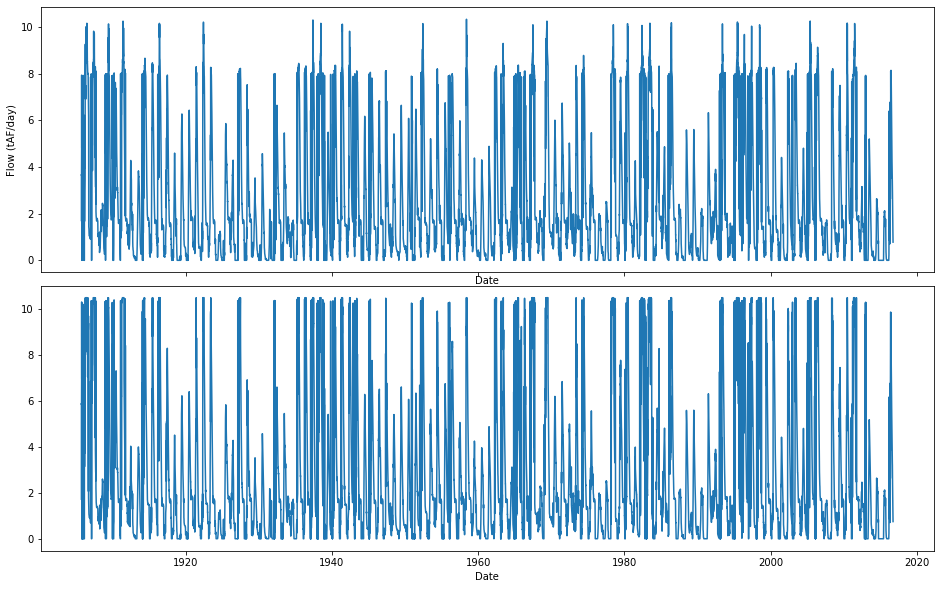

In [23]:
### flow into FKC from millerton
fig, axs = plt.subplots(2,1, figsize=figsize, sharex=True, gridspec_kw={'hspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.plot(flows[s]['fkc_COF_flow'])
    ax.set_xlabel('Date')
a = axs[0].set_ylabel('Flow (tAF/day)')

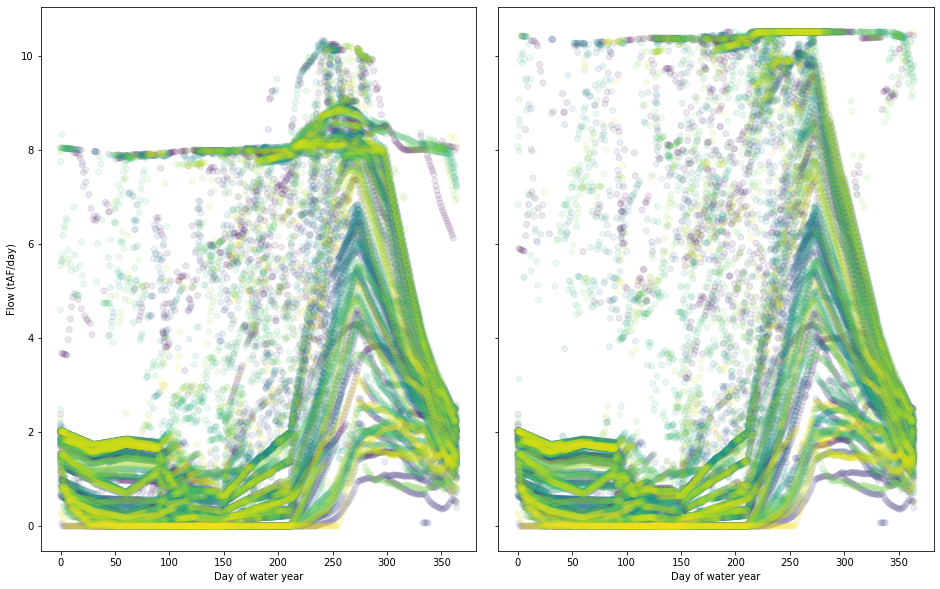

In [24]:
### flow into FKC from millerton
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

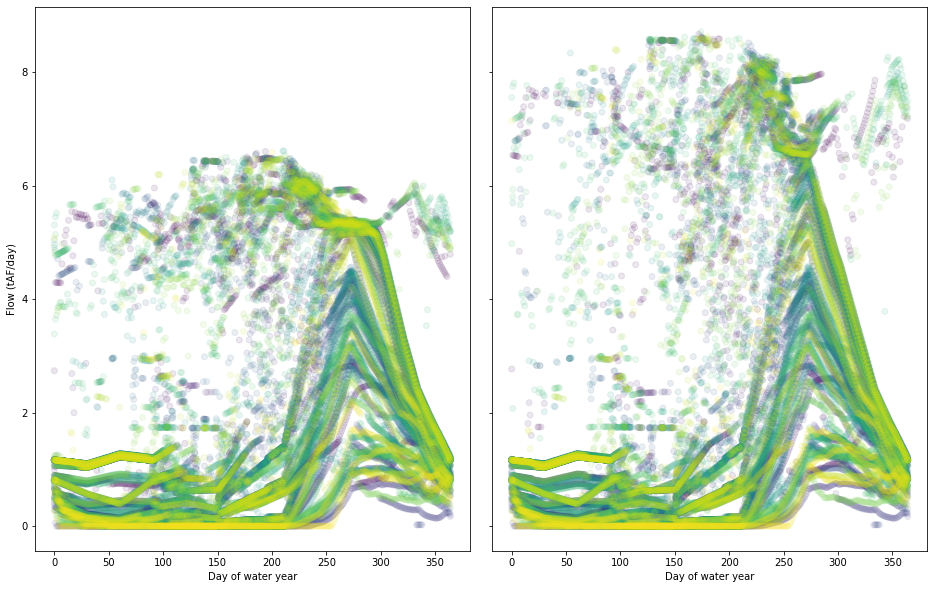

In [25]:
### flow into LWT
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, flows[s]['fkc_LWT_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

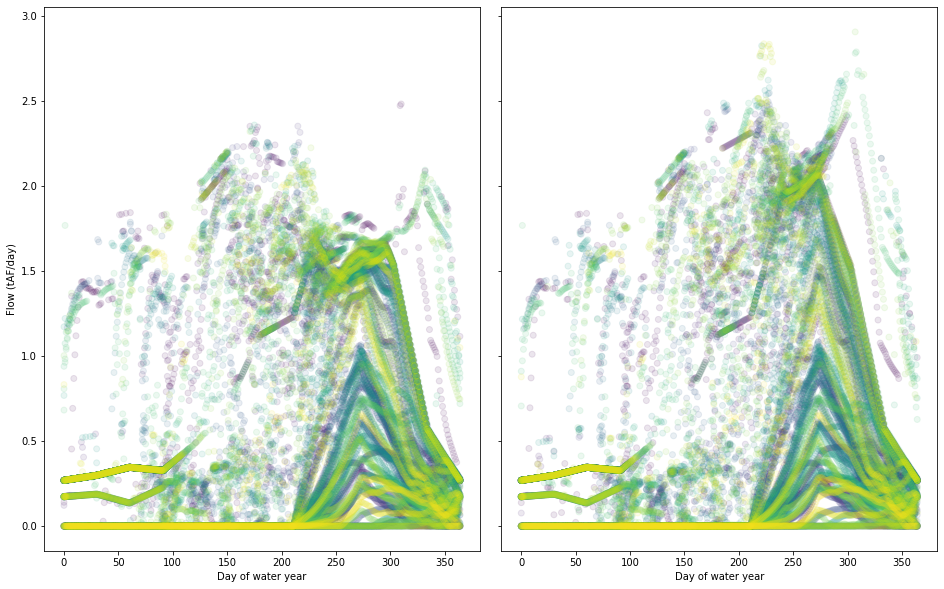

In [26]:
### turnout at LWT
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, turnouts[s]['fkc_LWT_turnout'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

In [27]:
flowkeys = [k.split('_')[1] for k in flows[s].keys()]
turnoutkeys = [k.split('_')[1] for k in turnouts[s].keys()]
print(flowkeys)
print(turnoutkeys)

['COF', 'FRS', 'KGR', 'OFK', 'TUL', 'KWD', 'OKW', 'KWR', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TLR', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']
['COF', 'FRS', 'OFK', 'TUL', 'KWD', 'OKW', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']


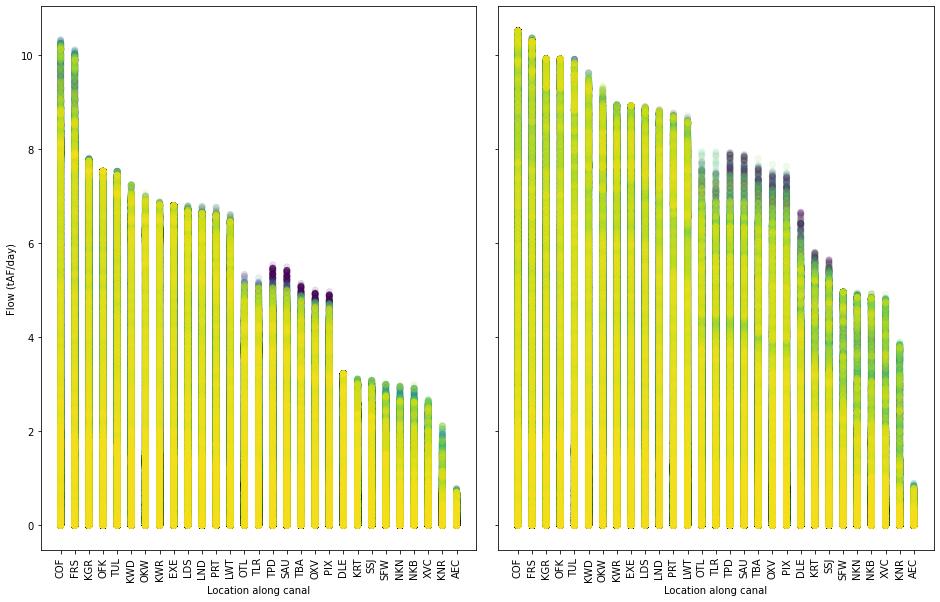

In [28]:
### flow along canal
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j,k in enumerate(flows[s]):
        ax.scatter([j for _ in flows[s][k]], flows[s][k], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(flows[s].shape[1]))
    ax.set_xticklabels(flowkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/day)')

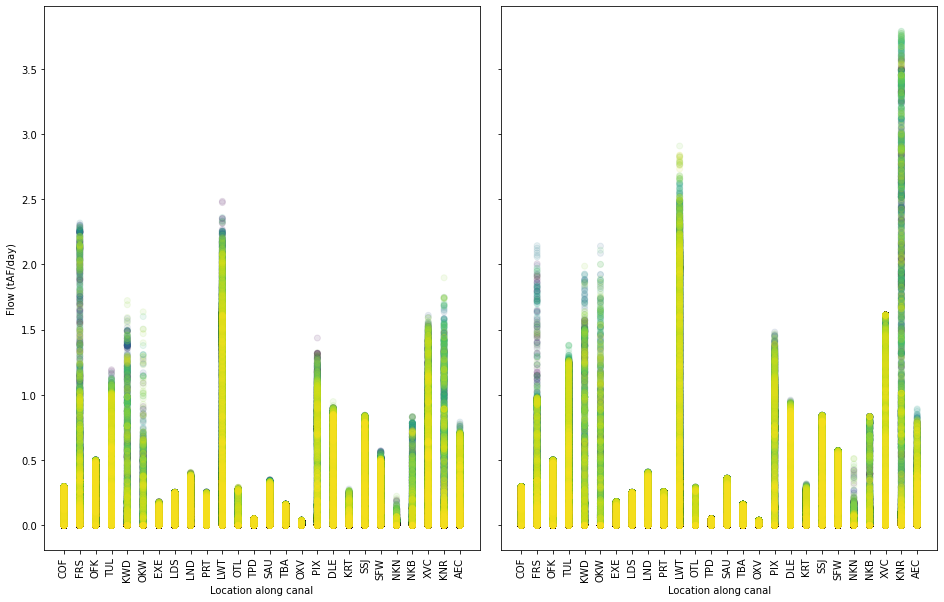

In [29]:
### turnouts along canal
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j,k in enumerate(turnouts[s]):
        ax.scatter([j for _ in turnouts[s][k]], turnouts[s][k], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(turnouts[s].shape[1]))
    ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/day)')

In [30]:
### annual totals
flowsums = {}
turnoutsums = {}
for s in scenarios:
    flowsums[s] = flows[s].groupby(wy).sum()
    turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [31]:
cmap = cm.get_cmap('RdBu')

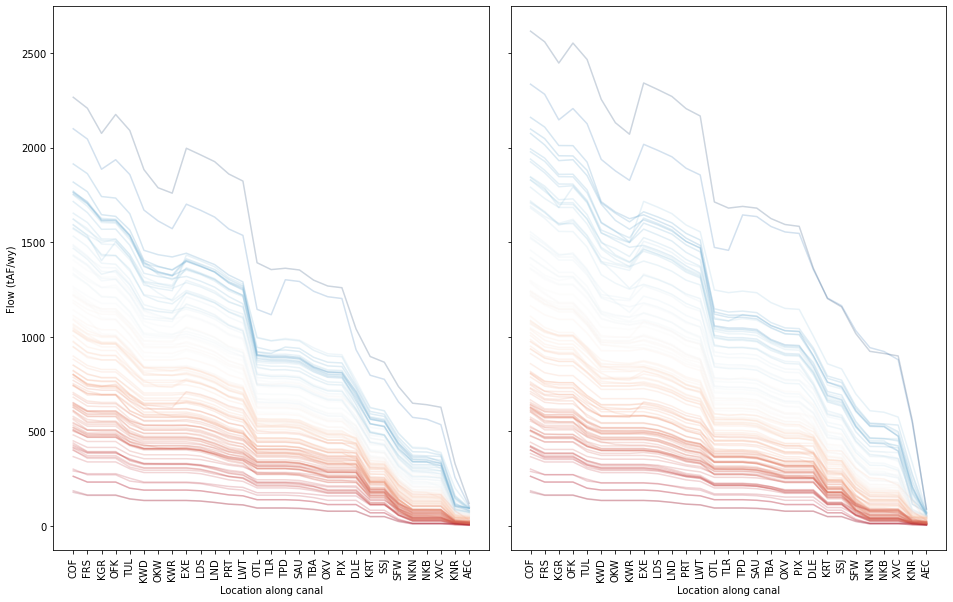

In [32]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(flowsums[s].shape[1]))
    ax.set_xticklabels(flowkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/wy)')

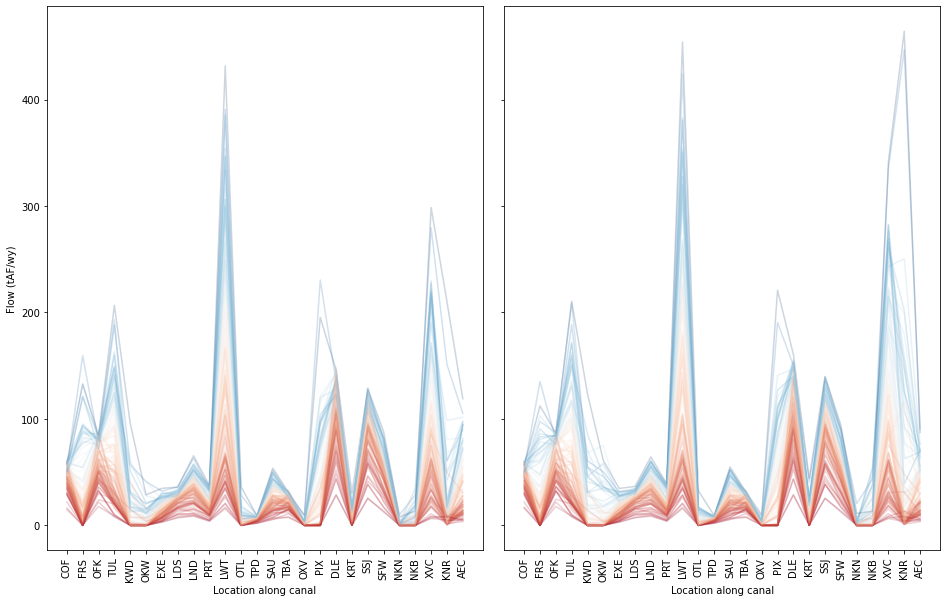

In [33]:
### turnouts along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j in range(turnoutsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
    ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/wy)')

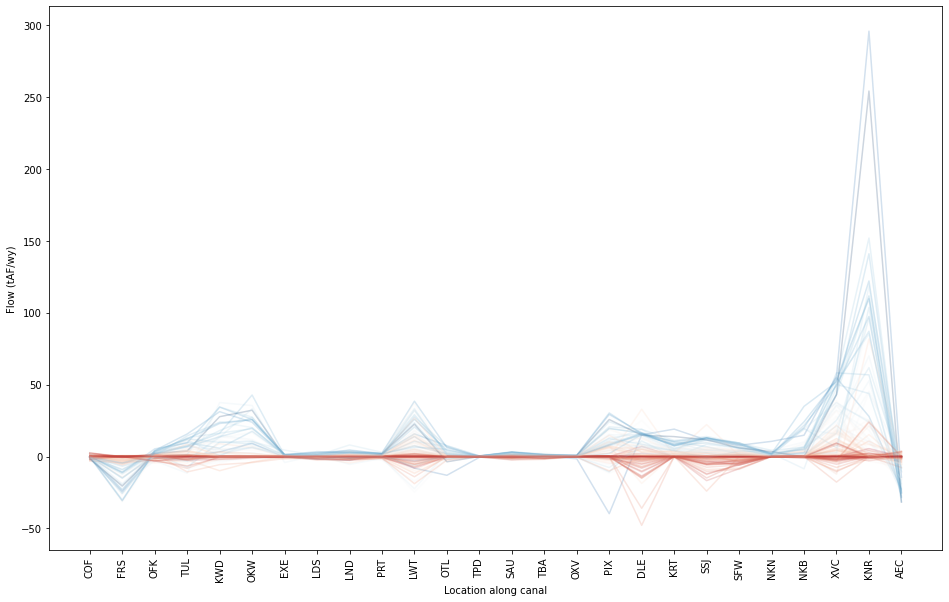

In [34]:
### difference between scenarios, turnouts along canal, annual flow. color based on total annual flow in fkc.
fig, ax = plt.subplots(1,1,figsize=figsize)
for j in range(turnoutsums[s].shape[0]):
    flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
    ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
ax.set_xlabel('Location along canal')
ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = ax.set_ylabel('Flow (tAF/wy)')

In [35]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_LWT','FKC_rehab_ownership_PIX','FKC_rehab_ownership_DLE','FKC_rehab_ownership_SSJ','FKC_rehab_ownership_SOC','FKC_rehab_ownership_LWT_PIX_DLE_SSJ','FKC_rehab_ownership_LWT_PIX_DLE_SSJ_SOC']
# flows = {}
# turnouts = {}
# for s in scenarios:
#     dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
#     keys = list(dat.keys())
#     b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
#     flows[s] = dat.loc[:, b]
#     b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
#     turnouts[s] = dat.loc[:, b]

In [36]:
# ### annual totals
# flowsums = {}
# turnoutsums = {}
# for s in scenarios:
#     flowsums[s] = flows[s].groupby(wy).sum()
#     turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [37]:
# ### flow into FKC from millerton
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
#     ax.set_xlabel('Day of water year')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1
# # a = axs[].set_ylabel('Flow (tAF/day)')

In [38]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(flowsums[s].shape[1]))
#         ax.set_xticklabels(flowkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    
# # a = axs[0].set_ylabel('Flow (tAF/wy)')

In [39]:
# ### not sure why we have negative flow - something wrong
# plt.plot(flows['FKC_rehab_ownership_LWT']['fkc_AEC_flow'])

In [40]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
# #         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    
# # a = axs[0].set_ylabel('Flow (tAF/wy)')

In [41]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(turnoutsums[s].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
# #         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    

In [42]:
# ### annual turnout boxplots
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.boxplot(turnoutsums[s] - turnoutsums[scenarios[0]])
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1])+1)
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    

In [43]:
# [s for s in keys if 'irvineranch' in s.split('_')]

In [44]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_LWT','FKC_rehab_ownership_PIX','FKC_rehab_ownership_DLE','FKC_rehab_ownership_SSJ','FKC_rehab_ownership_SOC','FKC_rehab_ownership_LWT_PIX_DLE_SSJ','FKC_rehab_ownership_LWT_PIX_DLE_SSJ_SOC']
# bankkeys = ['semitropic_MET', 'semitropic_SOB', 'rosedale_RRB','rosedale_ARV','rosedale_DLE','rosedale_CTL','rosedale_CCH',
#              'rosedale_BVA', 'rosedale_SOC', 'rosedale_KRT', 'kwb_DLR', 'kwb_KCWA', 'kwb_ID4', 'kwb_SMI', 'kwb_TJC', 'kwb_WON',
#             'kwb_WRM','pioneer_BLR', 'pioneer_BDM', 'pioneer_BVA', 'pioneer_HML', 'pioneer_ID4', 'pioneer_KCWA', 'pioneer_KND',
#             'pioneer_LHL', 'pioneer_RRB', 'pioneer_SMI', 'pioneer_TJC', 'pioneer_WRM', 'arvin_ARV', 'arvin_MET', 'arvin_OXV',
#             'arvin_LWT', 'arvin_KRT', 'arvin_PIX', 'northkernwb_NKN', 'northkernwb_CWO', 'northkernwb_DLE',
#            'berrendawb_BLR', 'berrendawb_BDM', 'berrendawb_LHL', 'berrendawb_WRM', 'b2800_COB', 'b2800_BLR', 'b2800_BDM',
#              'b2800_BVA', 'b2800_CWO', 'b2800_HML', 'b2800_ID4', 'b2800_KCWA', 'b2800_KND', 'b2800_LHL', 'b2800_RRB',
#              'b2800_TJC', 'b2800_WRM', 'wkwb_WKN']
# banking = {}
# for s in scenarios:
#     dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
#     banking[s] = dat.loc[:, bankkeys]

In [45]:
# ### banking across scenarios
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.set_title(s)
#     for k in bankkeys:
#         ax.plot(banking[s][k])
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1

In [46]:
# ### banking relative to baseline_wy2017
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.set_title(s)
#     for k in bankkeys:
#         ax.plot(banking[s][k] - banking[scenarios[0]][k], label=k)
# #     ax.legend()
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1

In [47]:
# ### change in banked water over 111 yrs
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j,k in enumerate(banking[s].columns):
#         ax.scatter([j], [banking[s][k].iloc[-1] - banking[s][k].iloc[0]], c='k')
#     ax.axhline(0, c='grey', ls=':')
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(banking[s].shape[1]))
#         ax.set_xticklabels(bankkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1  
#         ax.set_ylabel('Banked (tAF)')

In [48]:
# ### change in banked water over 111 yrs, relative to baseline_wy2017
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j,k in enumerate(banking[s].columns):
#         ax.scatter([j], [(banking[s][k].iloc[-1] - banking[s][k].iloc[0]) - (banking[scenarios[0]][k].iloc[-1] - banking[scenarios[0]][k].iloc[0])], c='k')
#     ax.axhline(0, c='grey', ls=':')
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(banking[s].shape[1]))
#         ax.set_xticklabels(bankkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1  
#         ax.set_ylabel('Banked (tAF)')

In [49]:
# banking[s].columns

## more FKC ownership scenarios, with no all-access round

In [50]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none', 'baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none','FKC_rehab_ownership_none']#,'FKC_rehab_ownership_grp3','FKC_rehab_ownership_grp12','FKC_rehab_ownership_grp13','FKC_rehab_ownership_bankees','FKC_rehab_ownership_none']
scenarios = ['FKC_experiment_none', 'FKC_experiment_all', 'FKC_experiment_0', 'FKC_experiment_1', 'FKC_experiment_2', 'FKC_experiment_3', 'FKC_experiment_4', 'FKC_experiment_5']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]

In [51]:
index = flows[scenarios[0]].index
year = index.year
month = index.month
dom = index.day
doy = index.dayofyear
dowy = (doy + (365-274)) % 365
wy = np.array([year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))])

In [52]:
figsize=(16,10)

In [53]:
### annual totals
flowsums = {}
turnoutsums = {}
for s in scenarios:
    flowsums[s] = flows[s].groupby(wy).sum()
    turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [54]:
flowkeys = [k.split('_')[1] for k in flows[s].keys()]
turnoutkeys = [k.split('_')[1] for k in turnouts[s].keys()]
print(flowkeys)
print(turnoutkeys)

['COF', 'FRS', 'KGR', 'OFK', 'TUL', 'KWD', 'OKW', 'KWR', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TLR', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']
['COF', 'FRS', 'OFK', 'TUL', 'KWD', 'OKW', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']


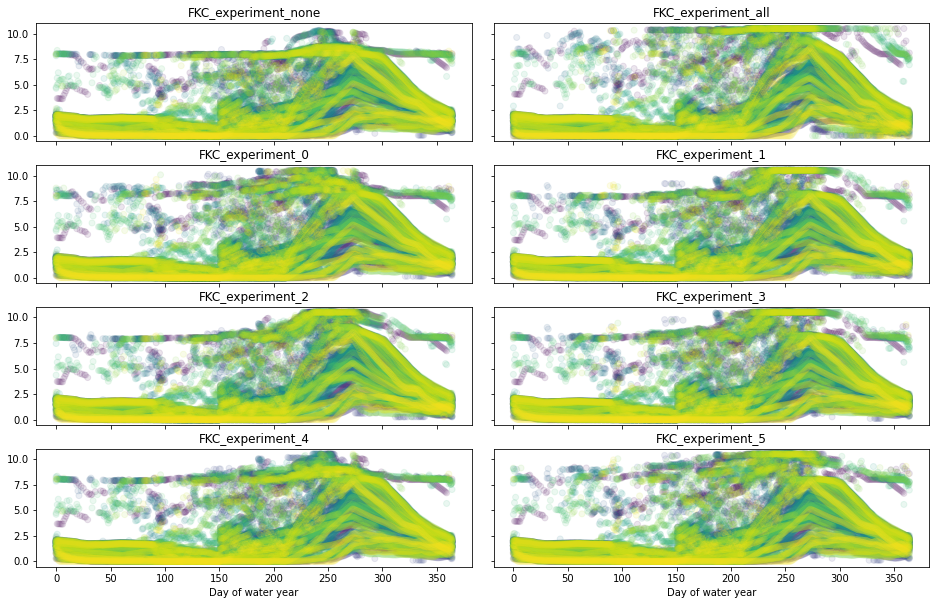

In [55]:
### flow into FKC from millerton
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Day of water year')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1
# a = axs[].set_ylabel('Flow (tAF/day)')

In [56]:
cmap = cm.get_cmap('RdBu')

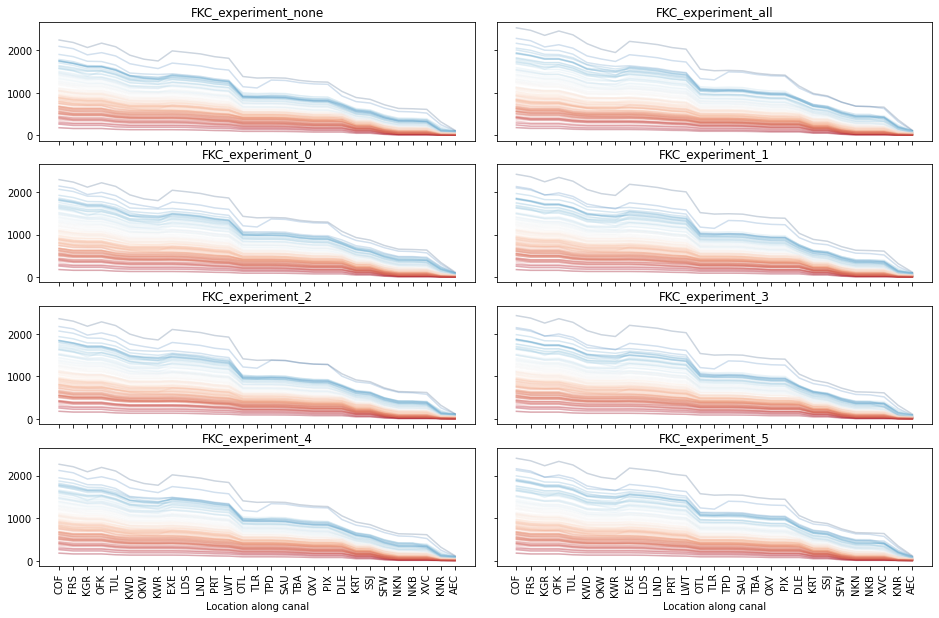

In [57]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(flowsums[s].shape[1]))
        ax.set_xticklabels(flowkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    
# a = axs[0].set_ylabel('Flow (tAF/wy)')

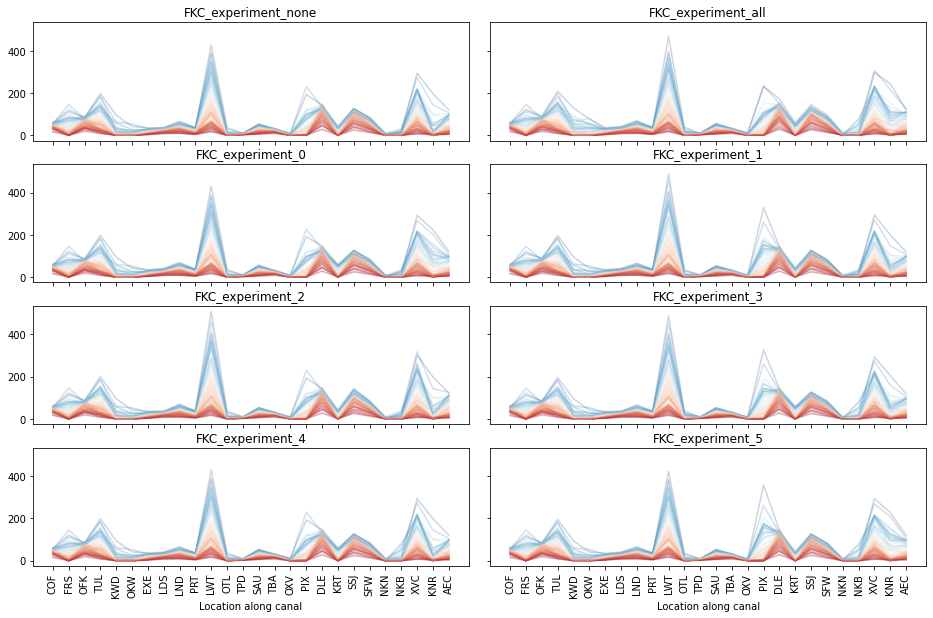

In [58]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    
# a = axs[0].set_ylabel('Flow (tAF/wy)')

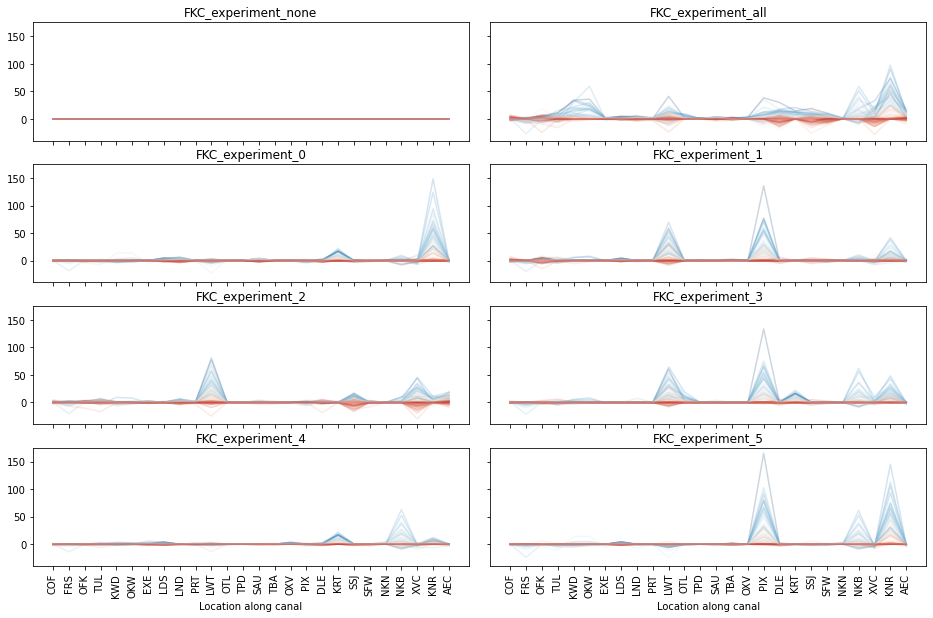

In [59]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

In [60]:
bars = []
stds = []
for s in scenarios[1:]:
    bars.append((turnoutsums[s] - turnoutsums[scenarios[0]]).sum(axis=1).mean())
    stds.append((turnoutsums[s] - turnoutsums[scenarios[0]]).sum(axis=1).std())

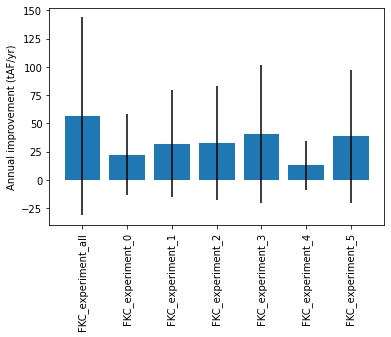

In [61]:
f = plt.bar(np.arange(len(bars)), bars, yerr=stds)
_ = plt.xticks(np.arange(len(bars)), scenarios[1:], rotation=90)
_ = plt.ylabel('Annual improvement (tAF/yr)')

## Objective formulation

In [62]:
shares = {}
for s in scenarios[2:]:
    shares[s] = json.load(open('results/' + s + '/FKC_scenario.json'))['ownership_shares']
#     print(shares)

In [63]:
district_lookup = {
    'BDM': 'berrenda',
    'BLR': 'belridge',
    'BVA': 'buenavista',
    'CWO': 'cawelo',
    'HML': 'henrymiller',
    'ID4': 'ID4',
    'KND': 'kerndelta',
    'LHL': 'losthills',
    'RRB': 'rosedale',
    'SMI': 'semitropic',
    'THC': 'tehachapi',
    'TJC': 'tejon',
    'WKN': 'westkern',
    'WRM': 'wheeler',
    'KCWA': 'kcwa',
    'COB': 'bakersfield',
    'NKN': 'northkern',
    'ARV': 'arvin',
    'PIX': 'pixley',
    'DLE': 'delano',
    'EXE': 'exeter',
    'KRT': 'kerntulare',
    'LND': 'lindmore',
    'LDS': 'lindsay',
    'LWT': 'lowertule',
    'PRT': 'porterville',
    'SAU': 'saucelito',
    'SFW': 'shaffer',
    'SSJ': 'sosanjoaquin',
    'TPD': 'teapot',
    'TBA': 'terra',
    'TUL': 'tulare',
    'COF': 'fresno',
    'FRS': 'fresnoid',
    'SOC': 'socal',
    'SOB': 'southbay',
    'CCA': 'centralcoast',
    'DLR': 'dudleyridge',
    'TLB': 'tularelake',
    'KWD': 'kaweahdelta',
    'WSL': 'westlands',
    'SNL': 'sanluiswater',
    'PNC': 'panoche',
    'DLP': 'delpuerto',
    'CWC': 'chowchilla',
    'MAD': 'madera',
    'OTL': 'othertule',
    'OFK': 'otherfriant',
    'OCD': 'othercvp',
    'OEX': 'otherexchange',
    'OXV': 'othercrossvalley',
    'OSW': 'otherswp',
    'CNS': 'consolidated',
    'ALT': 'alta',
    'KRWA': 'krwa'
}

In [64]:
districts = {}
for i, s in enumerate(scenarios):
    districts[s] = {}
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    for d, v in district_lookup.items():
        b = [k for k in keys if (((d in k.split('_')) or (v in k.split('_'))) and (('delivery' in k.split('_')) or ('flood' in k.split('_')) or ('recharged' in k.split('_')) or ('exchanged' in k.split('_')) or ('inleiu' in k.split('_')) or ('peiupumping' in k.split('_')) or ('banked' in k.split('_'))))]
        df = dat.loc[:, b]
        ## undo summation over years
        for y in range(df.index.year.min() + 2, df.index.year.max() + 1):
            maxprevious = df.loc[wy < y, :].iloc[-1, :]
            df.loc[wy == y, :] += maxprevious
        districts[s][d] = df.diff()
    del dat, df
    
#         try:
#             if i < 2:
#                 use_district = 1
#             else:
#                 if shares[s][d] > 0.0:
#                     use_district = 1
#                 else:
#                     use_district = 0
#             if use_district == 1:
#                 b = [k for k in keys if (((d in k.split('_')) or (v in k.split('_'))) and (('delivery' in k.split('_')) or ('flood' in k.split('_')) or ('recharged' in k.split('_')) or ('exchanged' in k.split('_')) or ('inleiu' in k.split('_')) or ('peiupumping' in k.split('_')) or ('banked' in k.split('_'))))]
#                 df = dat.loc[:, b]
#                 ## undo summation over years
#                 for y in range(df.index.year.min() + 2, df.index.year.max() + 1):
#                     maxprevious = df.loc[wy < y, :].iloc[-1, :]
#                     df.loc[wy == y, :] += maxprevious
#                 districts[s][d] = df.diff()
#         except:
#             pass    

In [65]:
districts[s]['BVA'].columns

Index(['buenavista_tableA_delivery', 'buenavista_tableA_recharged',
       'buenavista_kern_delivery', 'buenavista_kern_recharged',
       'buenavista_tableA_flood', 'buenavista_tableA_flood_irrigation',
       'buenavista_friant1_flood', 'buenavista_friant1_flood_irrigation',
       'buenavista_kaweah_flood', 'buenavista_kaweah_flood_irrigation',
       'buenavista_tule_flood', 'buenavista_tule_flood_irrigation',
       'buenavista_kern_flood', 'buenavista_kern_flood_irrigation',
       'buenavista_kings_flood', 'buenavista_kings_flood_irrigation',
       'buenavista_PIO_recharged', 'buenavista_B2800_recharged',
       'buenavista_RRB_recharged', 'buenavista_recover_banked',
       'buenavista_exchanged_GW', 'buenavista_exchanged_SW'],
      dtype='object')

In [66]:
def total_deliveries(df):
    df['total_deliveries'] = 0.0
    for (wtype, position) in [('delivery', 2), ('flood', 2), ('recover', 1)]:
        for c in df.columns:
            try:
                if c.split('_')[position] == wtype:
                    df['total_deliveries'] += df[c]
            except:
                pass

In [67]:
for s in scenarios:
    for k in districts[s]:
        total_deliveries(districts[s][k])

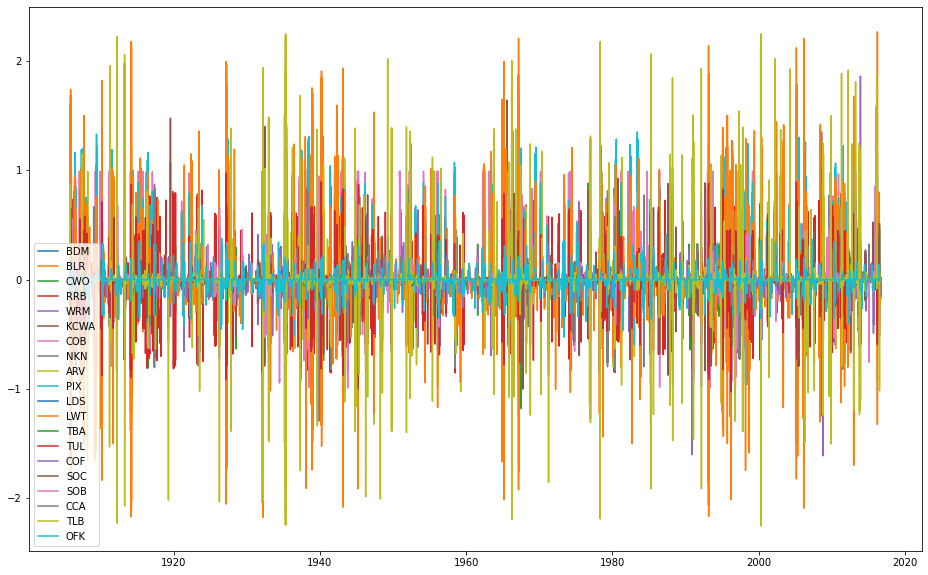

In [68]:
s=scenarios[3]
days = 365*10
plt.figure(figsize=figsize)
for k in districts[s]:
    y = districts[s][k]['total_deliveries'] - districts[scenarios[0]][k]['total_deliveries']
    if y.sum() > 10:
        plt.plot(y, label=k)
# plt.plot(districts[s]['CWO']['total_deliveries'].iloc[:days] - districts[scenarios[0]]['CWO']['total_deliveries'].iloc[:days], label=k)

plt.legend()

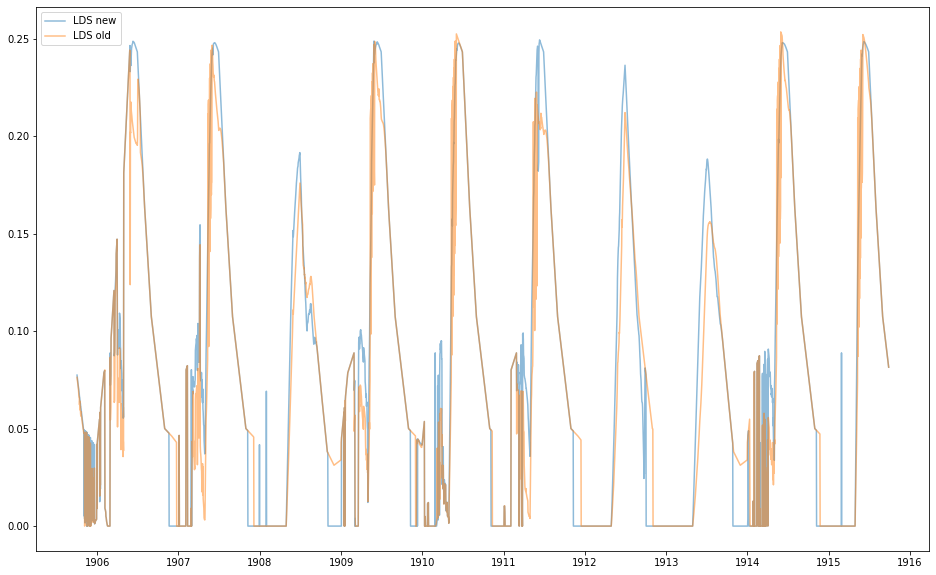

In [69]:
days = 365*10
plt.figure(figsize=figsize)
for k in ['LDS']:
    plt.plot(districts[s][k]['total_deliveries'].iloc[:days], alpha=0.5, label=k + ' new')
    plt.plot(districts[scenarios[0]][k]['total_deliveries'].iloc[:days], alpha=0.5, label=k + ' old')
    
plt.legend()

In [70]:
(districts[s]['CWO']['total_deliveries'].iloc[:days] - districts[scenarios[0]]['CWO']['total_deliveries'].iloc[:days]).sum()

-0.25466397218819625

In [71]:
districts[scenarios[5]].keys()

dict_keys(['BDM', 'BLR', 'BVA', 'CWO', 'HML', 'ID4', 'KND', 'LHL', 'RRB', 'SMI', 'THC', 'TJC', 'WKN', 'WRM', 'KCWA', 'COB', 'NKN', 'ARV', 'PIX', 'DLE', 'EXE', 'KRT', 'LND', 'LDS', 'LWT', 'PRT', 'SAU', 'SFW', 'SSJ', 'TPD', 'TBA', 'TUL', 'COF', 'FRS', 'SOC', 'SOB', 'CCA', 'DLR', 'TLB', 'KWD', 'WSL', 'SNL', 'PNC', 'DLP', 'CWC', 'MAD', 'OTL', 'OFK', 'OCD', 'OEX', 'OXV', 'OSW', 'CNS', 'ALT', 'KRWA'])

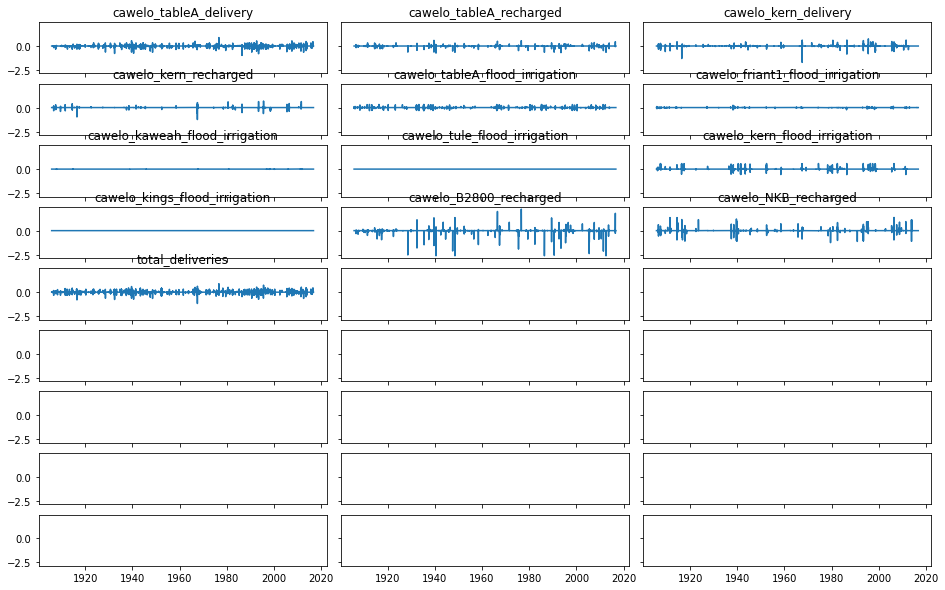

In [72]:
d = 'CWO'
nrow=9
ncol=3
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=figsize, gridspec_kw={'wspace':0.05})
row = 0
col = 0  
for i,k in enumerate(districts[s][d]):
    ax = axs[row,col]
    try:
        ax.plot(districts[s][d][k] - districts[scenarios[0]][d][k], label=k)
    except:
        ax.plot(districts[s][d][k], label=k)
        
    ax.set_title(k)
    if row == nrow-1:
        ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == ncol-1:
        row += 1
        col = 0
    else:
        col += 1         


In [73]:
### get annual results
districts_wy = {}
for s in scenarios:
    districts_wy[s] = {}
    for d in districts[s]:
        districts_wy[s][d] = districts[s][d].groupby(wy).sum()

In [74]:
wy_agg = np.arange(1906, 2017)
district_keys = list(districts[scenarios[1]].keys())
nd = len(district_keys)

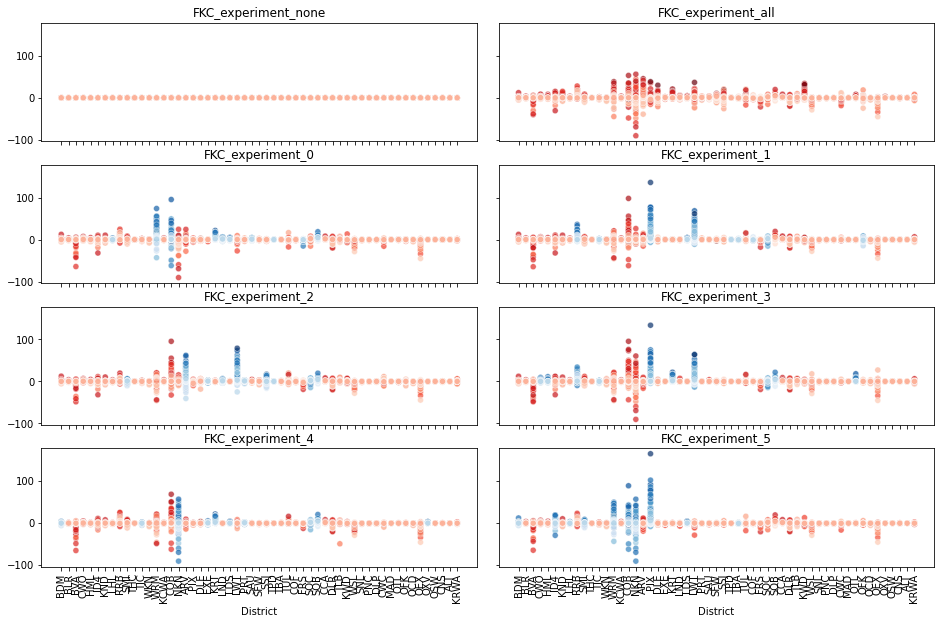

In [75]:
### annual deliveries for each district (difference from "none" scenario)
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j for _ in wy_agg], y=districts_wy[s][k]['total_deliveries'].values - districts_wy[scenarios[0]][k]['total_deliveries'].values, hue=flowfrac, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

In [76]:
### get objectives
objs_districts = {}
for s in scenarios:
    objs_districts[s] = {}
    for d in district_keys:
        objs_districts[s][d] = {}
        objs_districts[s][d]['exp_gain'] = (districts_wy[s][d]['total_deliveries'] - districts_wy[scenarios[0]][d]['total_deliveries']).mean()
        objs_districts[s][d]['std_gain'] = (districts_wy[s][d]['total_deliveries'] - districts_wy[scenarios[0]][d]['total_deliveries']).std()
        objs_districts[s][d]['exp_del'] = (districts_wy[s][d]['total_deliveries']).mean()
        objs_districts[s][d]['std_del'] = (districts_wy[s][d]['total_deliveries']).std()       

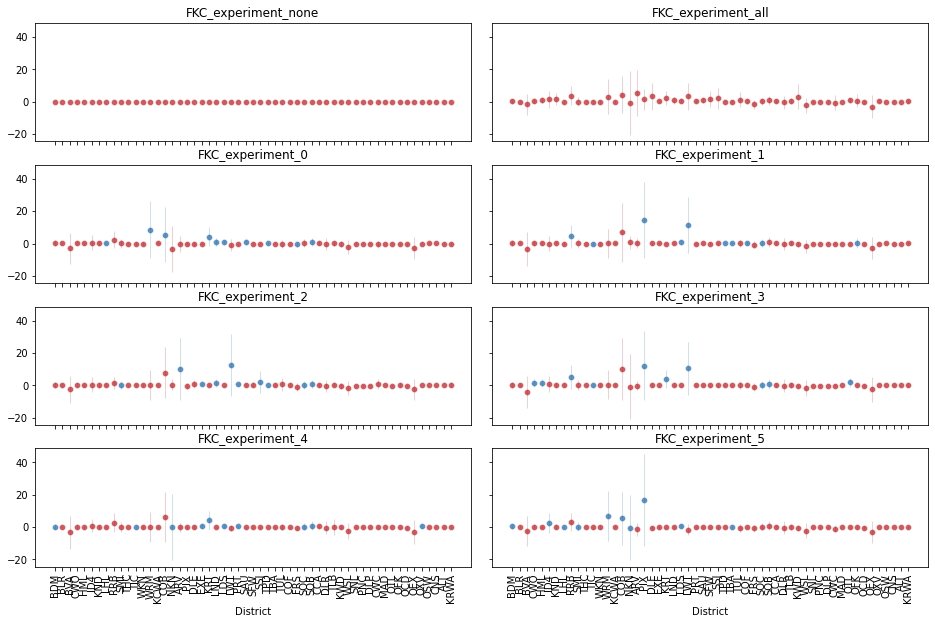

In [77]:
### total expected gain per year for each district (difference from "none" scenario)
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j], y=[objs_districts[s][k]['exp_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
        sns.lineplot(x=[j, j], y=[objs_districts[s][k]['exp_gain'] + objs_districts[s][k]['std_gain'], objs_districts[s][k]['exp_gain'] - objs_districts[s][k]['std_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

## look at different water bank scenarios

In [78]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none', 'baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none','FKC_rehab_ownership_none']#,'FKC_rehab_ownership_grp3','FKC_rehab_ownership_grp12','FKC_rehab_ownership_grp13','FKC_rehab_ownership_bankees','FKC_rehab_ownership_none']
scenarios = ['NFWB_zero_ownership_LWT90_PIX10', 'NFWB_small_ownership_LWT90_PIX10', 'NFWB_large_ownership_LWT90_PIX10']
# scenarios = ['NFWB_large_ownership_LWT90_PIX10']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]

In [79]:
index = flows[scenarios[0]].index
year = index.year
month = index.month
dom = index.day
doy = index.dayofyear
dowy = (doy + (365-274)) % 365
wy = np.array([year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))])

In [80]:
figsize=(16,10)

In [81]:
cmap = cm.get_cmap('RdBu')

In [82]:
### annual totals
flowsums = {}
turnoutsums = {}
for s in scenarios:
    flowsums[s] = flows[s].groupby(wy).sum()
    turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [83]:
flowkeys = [k.split('_')[1] for k in flows[s].keys()]
turnoutkeys = [k.split('_')[1] for k in turnouts[s].keys()]
print(flowkeys)
print(turnoutkeys)

['NFWB', 'COF', 'FRS', 'KGR', 'OFK', 'TUL', 'KWD', 'OKW', 'KWR', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TLR', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']
['NFWB', 'COF', 'FRS', 'OFK', 'TUL', 'KWD', 'OKW', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']


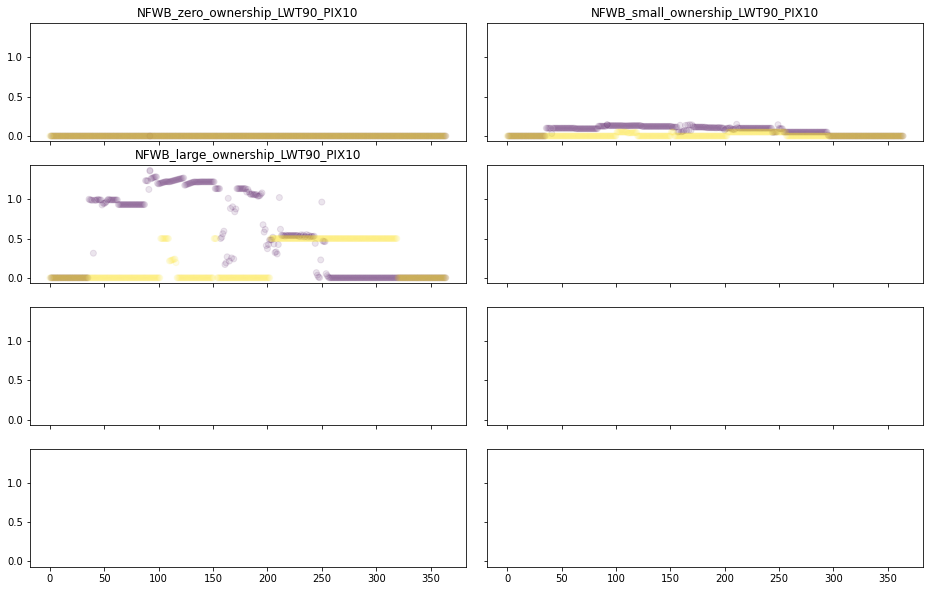

In [84]:
### flow into FKC from millerton
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    try:
        ax.scatter(dowy, turnouts[s]['fkc_NFWB_turnout'], c=wy, alpha=0.1, cmap='viridis')
    except:
        ax.scatter(dowy, turnouts[s]['fkc_LWT_turnout']*0.0, c=wy, alpha=0.1, cmap='viridis')
        
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Day of water year')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1
# a = axs[].set_ylabel('Flow (tAF/day)')

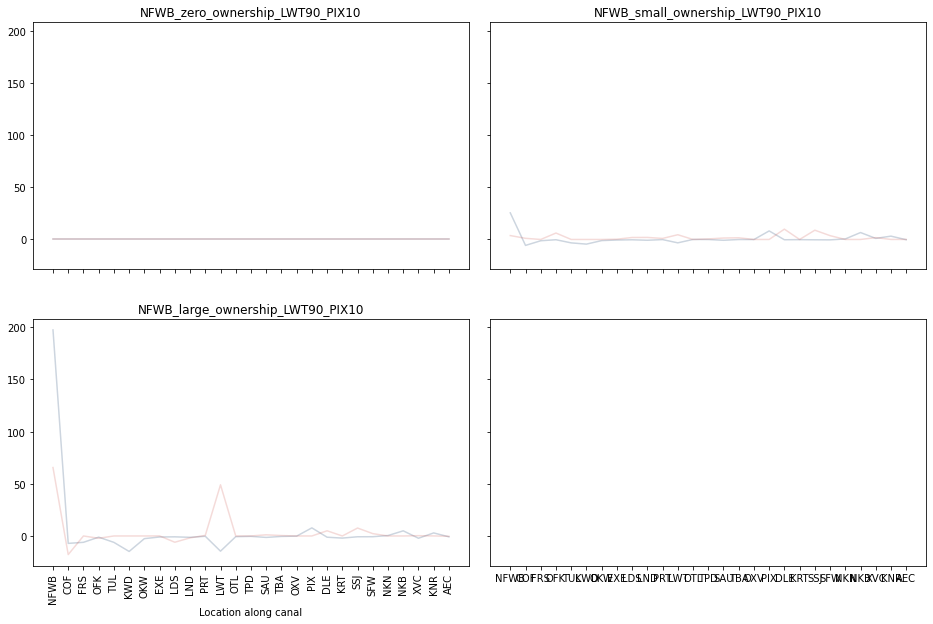

In [85]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(2,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[0]]['fkc_NFWB_flow'].iloc[j] / flowsums[scenarios[0]]['fkc_NFWB_flow'].max()
#         y = turnoutsums[s].iloc[j, :]
        y = np.zeros(len(turnoutkeys))
        if i > 0:
            y[0] = turnoutsums[s].iloc[j, 0]
            y[1:] = turnoutsums[s].iloc[j, 1:] - turnoutsums[scenarios[0]].iloc[j,:]
        ax.plot(np.arange(len(turnoutkeys)), y, alpha=0.2, c=cmap(flowfrac))
                    
#         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 1:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(len(turnoutkeys)))
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

In [86]:
dat = get_results_sensitivity_number_outside_model('results/NFWB_small_ownership_LWT90_PIX10/results.hdf5', '')

In [87]:
[k for k in dat.columns if 'northfriantwb' in k.split('_')]

['northfriantwb_LWT', 'northfriantwb_PIX']

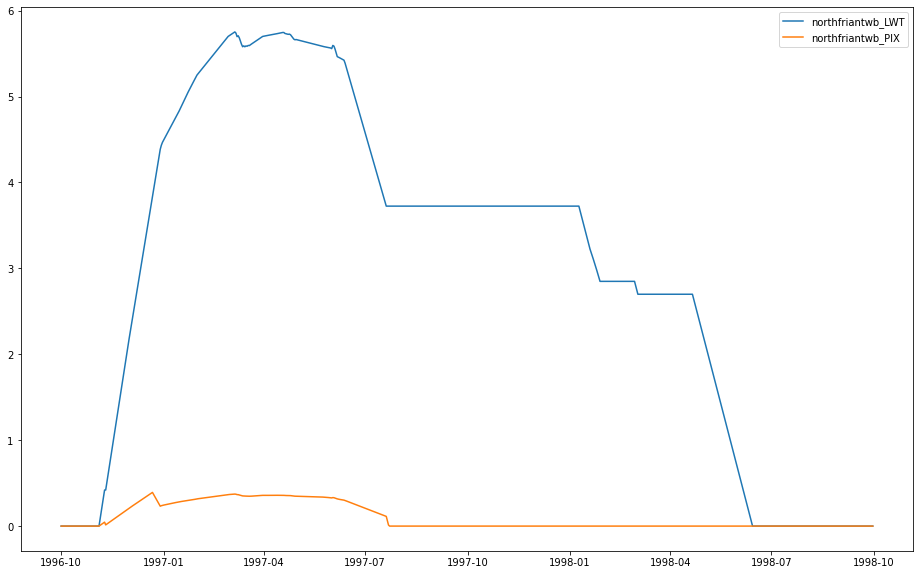

In [88]:
### flow along canal, annual flow. color based on wet/dry year.
fig, ax = plt.subplots(1,1, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
for k in [k for k in dat.columns if 'northfriantwb' in k.split('_')]:
    plt.plot(dat[k], label=k)
plt.legend()

## scratch

In [69]:
figsize=(16,10)
dat = get_results_sensitivity_number_outside_model('results/FKC_experiment_2_FKC_NFWB/results.hdf5', '')

In [70]:
k = [k for k in dat.columns if 'northfriantwb' in k.split('_')]

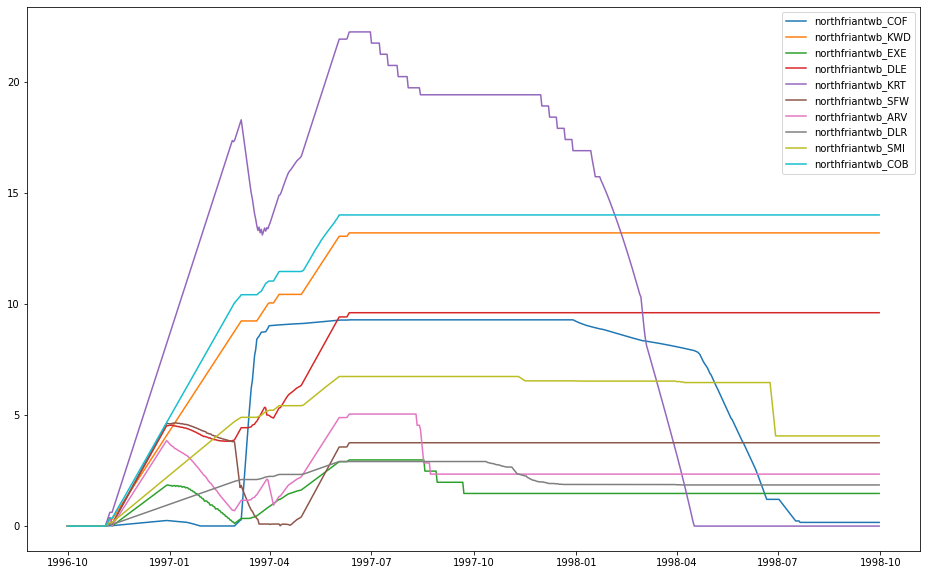

In [71]:
### flow along canal, annual flow. color based on wet/dry year.
fig, ax = plt.subplots(1,1, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
for k in [k for k in dat.columns if 'northfriantwb' in k.split('_')]:
#     print(k, dat[k].max())
        plt.plot(dat[k], label=k)
#     if k=='SOB':
#         plt.plot(dat[k], label=k, c='k')
plt.legend()

In [42]:
### flow along canal, annual flow. color based on wet/dry year.
for k in [k for k in dat.columns if 'northfriantwb' in k.split('_')]:
    print(k, dat[k].max())


northfriantwb_COF 9.286067139013118
northfriantwb_KWD 13.199089113721872
northfriantwb_EXE 2.978901234243251
northfriantwb_DLE 9.606732525336053
northfriantwb_KRT 22.248869511892064
northfriantwb_SFW 4.652214999279615
northfriantwb_ARV 5.0438804101675085
northfriantwb_DLR 2.9070317959770624
northfriantwb_SMI 6.745868400908746
northfriantwb_COB 14.0949265107338


## 20x3 FKC/NFWB experiment

In [35]:
scenarios = ['FKC_experiment_none']
for i in range(20):
    scenarios.append('FKC_experiment_'+str(i)+'_FKC_NFWB')
for i in range(20):
    scenarios.append('FKC_experiment_'+str(i)+'_FKC')
for i in range(20):
    scenarios.append('FKC_experiment_'+str(i)+'_NFWB')

In [36]:
figsize=(16,10)

In [37]:
cmap = cm.get_cmap('RdBu')

In [38]:
scenarios

['FKC_experiment_none',
 'FKC_experiment_0_FKC_NFWB',
 'FKC_experiment_1_FKC_NFWB',
 'FKC_experiment_2_FKC_NFWB',
 'FKC_experiment_3_FKC_NFWB',
 'FKC_experiment_4_FKC_NFWB',
 'FKC_experiment_5_FKC_NFWB',
 'FKC_experiment_6_FKC_NFWB',
 'FKC_experiment_7_FKC_NFWB',
 'FKC_experiment_8_FKC_NFWB',
 'FKC_experiment_9_FKC_NFWB',
 'FKC_experiment_10_FKC_NFWB',
 'FKC_experiment_11_FKC_NFWB',
 'FKC_experiment_12_FKC_NFWB',
 'FKC_experiment_13_FKC_NFWB',
 'FKC_experiment_14_FKC_NFWB',
 'FKC_experiment_15_FKC_NFWB',
 'FKC_experiment_16_FKC_NFWB',
 'FKC_experiment_17_FKC_NFWB',
 'FKC_experiment_18_FKC_NFWB',
 'FKC_experiment_19_FKC_NFWB',
 'FKC_experiment_0_FKC',
 'FKC_experiment_1_FKC',
 'FKC_experiment_2_FKC',
 'FKC_experiment_3_FKC',
 'FKC_experiment_4_FKC',
 'FKC_experiment_5_FKC',
 'FKC_experiment_6_FKC',
 'FKC_experiment_7_FKC',
 'FKC_experiment_8_FKC',
 'FKC_experiment_9_FKC',
 'FKC_experiment_10_FKC',
 'FKC_experiment_11_FKC',
 'FKC_experiment_12_FKC',
 'FKC_experiment_13_FKC',
 'FKC_experi

In [72]:
shares = {}
for s in scenarios:
    shares[s] = json.load(open('results/' + s + '/FKC_scenario.json'))['ownership_shares']
    shares_NFWB = json.load(open('results/' + s + '/NFWB_scenario.json'))['ownership']
    for k in shares[s]:
        try:
            shares[s][k] = max(shares[s][k], shares_NFWB[k])
        except:
            pass

In [40]:
district_lookup = {
    'BDM': 'berrenda',
    'BLR': 'belridge',
    'BVA': 'buenavista',
    'CWO': 'cawelo',
    'HML': 'henrymiller',
    'ID4': 'ID4',
    'KND': 'kerndelta',
    'LHL': 'losthills',
    'RRB': 'rosedale',
    'SMI': 'semitropic',
    'THC': 'tehachapi',
    'TJC': 'tejon',
    'WKN': 'westkern',
    'WRM': 'wheeler',
    'KCWA': 'kcwa',
    'COB': 'bakersfield',
    'NKN': 'northkern',
    'ARV': 'arvin',
    'PIX': 'pixley',
    'DLE': 'delano',
    'EXE': 'exeter',
    'KRT': 'kerntulare',
    'LND': 'lindmore',
    'LDS': 'lindsay',
    'LWT': 'lowertule',
    'PRT': 'porterville',
    'SAU': 'saucelito',
    'SFW': 'shaffer',
    'SSJ': 'sosanjoaquin',
    'TPD': 'teapot',
    'TBA': 'terra',
    'TUL': 'tulare',
    'COF': 'fresno',
    'FRS': 'fresnoid',
    'SOC': 'socal',
    'SOB': 'southbay',
    'CCA': 'centralcoast',
    'DLR': 'dudleyridge',
    'TLB': 'tularelake',
    'KWD': 'kaweahdelta',
    'WSL': 'westlands',
    'SNL': 'sanluiswater',
    'PNC': 'panoche',
    'DLP': 'delpuerto',
    'CWC': 'chowchilla',
    'MAD': 'madera',
    'OTL': 'othertule',
    'OFK': 'otherfriant',
    'OCD': 'othercvp',
    'OEX': 'otherexchange',
    'OXV': 'othercrossvalley',
    'OSW': 'otherswp',
    'CNS': 'consolidated',
    'ALT': 'alta',
    'KRWA': 'krwa'
}

In [41]:
districts = {}
for i, s in enumerate(scenarios):
    districts[s] = {}
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    index = dat.index
    year = index.year
    month = index.month
    dom = index.day
    doy = index.dayofyear
    dowy = (doy + (365-274)) % 365
    wy = np.array([year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))])
    for d, v in district_lookup.items():
        b = [k for k in keys if (((d in k.split('_')) or (v in k.split('_'))) and (('delivery' in k.split('_')) or ('flood' in k.split('_')) or ('recharged' in k.split('_')) or ('exchanged' in k.split('_')) or ('inleiu' in k.split('_')) or ('peiupumping' in k.split('_')) or ('banked' in k.split('_'))))]
        df = dat.loc[:, b]
        ## undo summation over years
        for y in range(df.index.year.min() + 2, df.index.year.max() + 1):
            maxprevious = df.loc[wy < y, :].iloc[-1, :]
            df.loc[wy == y, :] += maxprevious
        districts[s][d] = df.diff()
    del dat, df

In [42]:
def total_deliveries(df):
    df['total_deliveries'] = 0.0
    for (wtype, position) in [('delivery', 2), ('flood', 2), ('recover', 1)]:
        for c in df.columns:
            try:
                if c.split('_')[position] == wtype:
                    df['total_deliveries'] += df[c]
            except:
                pass

In [43]:
for s in scenarios:
    for k in districts[s]:
        total_deliveries(districts[s][k])

In [44]:
### get annual results
districts_wy = {}
for s in scenarios:
    districts_wy[s] = {}
    for d in districts[s]:
        districts_wy[s][d] = districts[s][d].groupby(wy).sum()

In [45]:
wy_agg = np.arange(1995, 2017)
district_keys = list(districts[scenarios[1]].keys())
nd = len(district_keys)

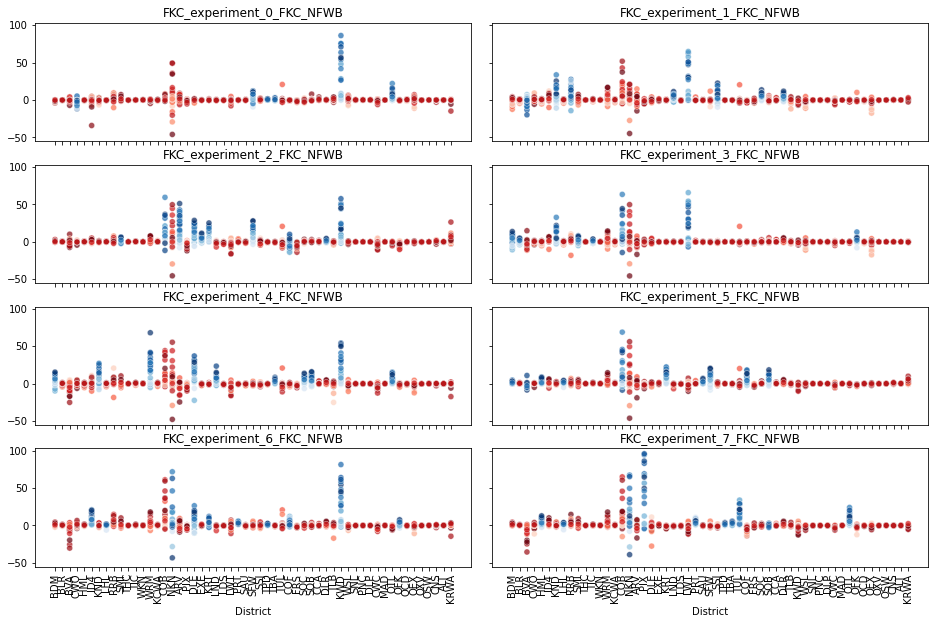

In [66]:
### annual deliveries for each district in each scenario
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:9]):
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        flowfrac = districts_wy[scenarios[0]]['LWT']['total_deliveries'] / districts_wy[scenarios[0]]['LWT']['total_deliveries'].max()
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j for _ in wy_agg], y=districts_wy[s][k]['total_deliveries'].values - districts_wy[scenarios[0]][k]['total_deliveries'].values, hue=flowfrac, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

In [67]:
### get objectives
objs_districts = {}
for s in scenarios:
    objs_districts[s] = {}
    for d in district_keys:
        objs_districts[s][d] = {}
        objs_districts[s][d]['exp_gain'] = (districts_wy[s][d]['total_deliveries'] - districts_wy[scenarios[0]][d]['total_deliveries']).mean()
        objs_districts[s][d]['std_gain'] = (districts_wy[s][d]['total_deliveries'] - districts_wy[scenarios[0]][d]['total_deliveries']).std()
        objs_districts[s][d]['exp_del'] = (districts_wy[s][d]['total_deliveries']).mean()
        objs_districts[s][d]['std_del'] = (districts_wy[s][d]['total_deliveries']).std()       

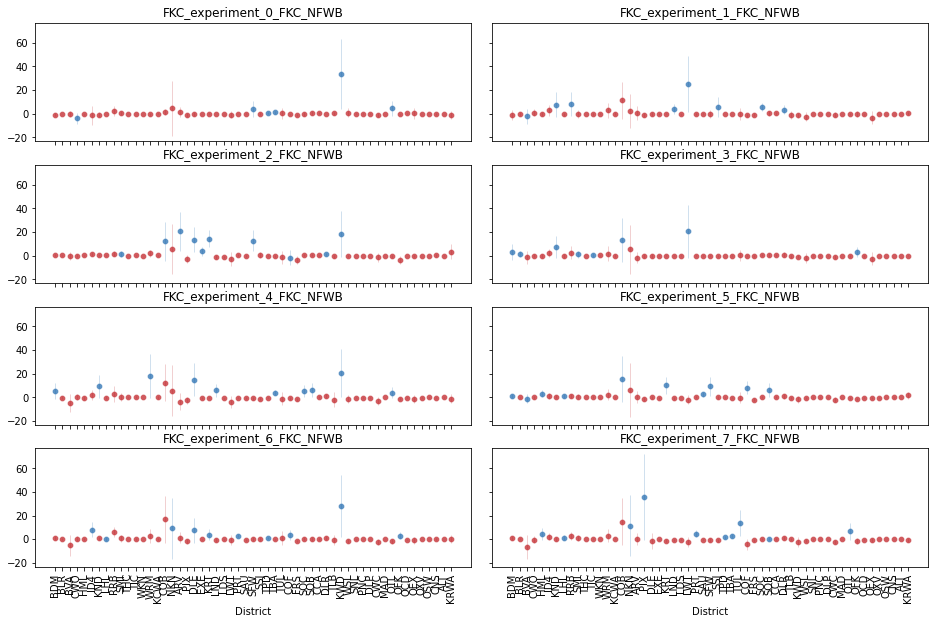

In [68]:
### total expected gain per year for each district (difference from "none" scenario)
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:9]):
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j], y=[objs_districts[s][k]['exp_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
        sns.lineplot(x=[j, j], y=[objs_districts[s][k]['exp_gain'] + objs_districts[s][k]['std_gain'], objs_districts[s][k]['exp_gain'] - objs_districts[s][k]['std_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

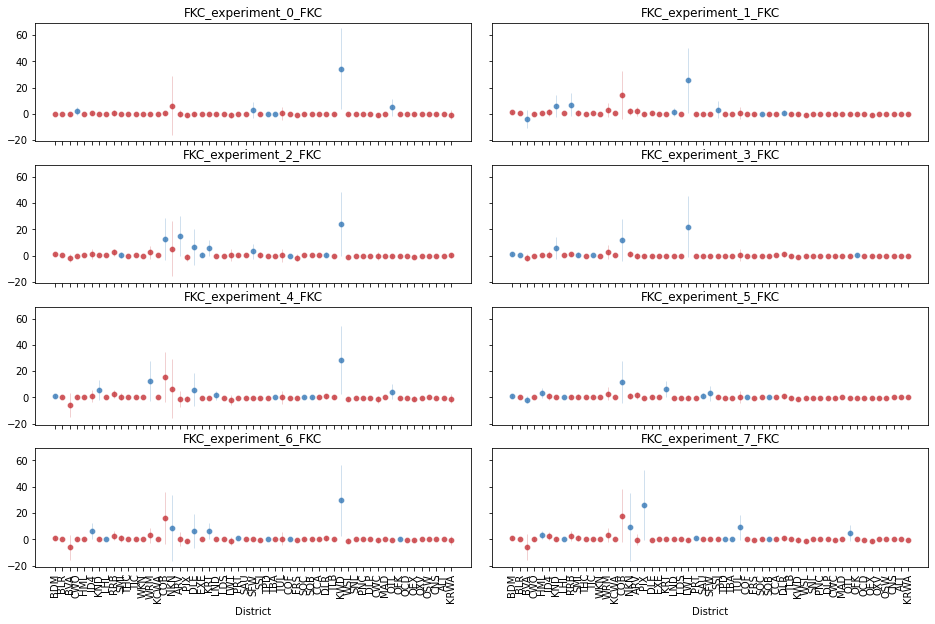

In [74]:
### total expected gain per year for each district (difference from "none" scenario)
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for s in scenarios[21:29]:
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j], y=[objs_districts[s][k]['exp_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
        sns.lineplot(x=[j, j], y=[objs_districts[s][k]['exp_gain'] + objs_districts[s][k]['std_gain'], objs_districts[s][k]['exp_gain'] - objs_districts[s][k]['std_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

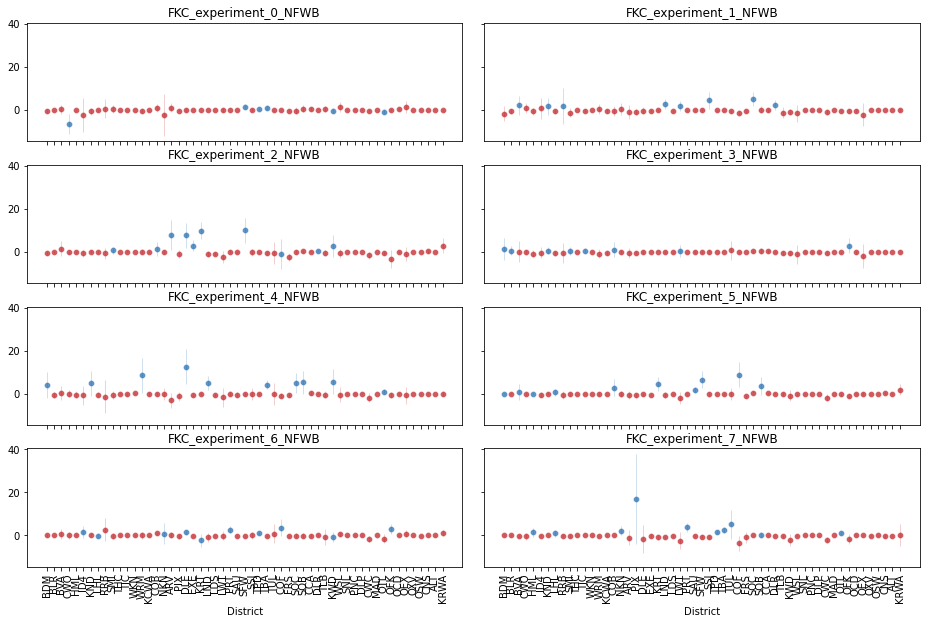

In [73]:
### total expected gain per year for each district (difference from "none" scenario)
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[41:49]):
    ax = axs[row,col]
    for j,k in enumerate(districts_wy[s]):
        try:
            cmap = 'Blues' if shares[s][k] > 0.0 else 'Reds'
        except:
            cmap = 'Reds'
        sns.scatterplot(x=[j], y=[objs_districts[s][k]['exp_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
        sns.lineplot(x=[j, j], y=[objs_districts[s][k]['exp_gain'] + objs_districts[s][k]['std_gain'], objs_districts[s][k]['exp_gain'] - objs_districts[s][k]['std_gain']], hue=0.8, hue_norm=(0,1), palette=cmap, legend=False, alpha=0.7, ax=ax)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('District')
        ax.set_xticks(np.arange(nd))
        ax.set_xticklabels(district_keys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

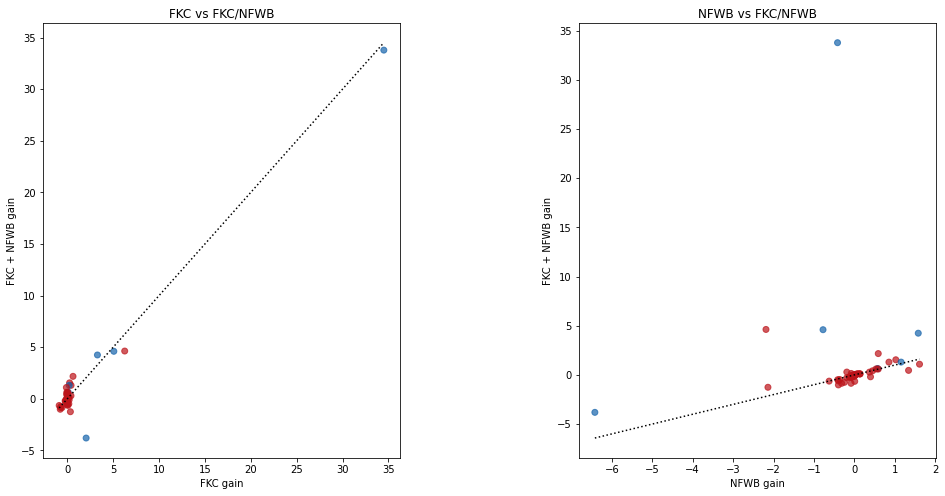

In [122]:
### scatter plot of benefits
s = 0

fig, axs = plt.subplots(1,2, figsize=(16,8), gridspec_kw={'wspace':0.5})

gain_FKC_NFWB = []
gain_FKC = []
gain_NFWB = []
scen = scenarios[s+1]
for k in objs_districts[scen]:
    gain_FKC_NFWB.append(objs_districts[scen][k]['exp_gain'])
scen = scenarios[s+1+20]
for k in objs_districts[scen]:
    gain_FKC.append(objs_districts[scen][k]['exp_gain'])
scen = scenarios[s+1+40]
for k in objs_districts[scen]:
    gain_NFWB.append(objs_districts[scen][k]['exp_gain'])
cols = []
for k in objs_districts[scen]:
    try:
        cmap = 'Blues' if shares[scen][k] > 0.0 else 'Reds'
        cols.append(cm.get_cmap(cmap)(0.8))
    except:
        cmap = 'Reds'
        cols.append(cm.get_cmap(cmap)(0.8))
    
ax = axs[0]
ax.set_title('FKC vs FKC/NFWB')
ax.set_xlabel('FKC gain')
ax.set_ylabel('FKC + NFWB gain')
ax.scatter(gain_FKC, gain_FKC_NFWB, c=cols, alpha=0.7)
ax.plot([min(gain_FKC), max(gain_FKC)],[min(gain_FKC), max(gain_FKC)], c='k', ls=':')

ax = axs[1]
ax.set_title('NFWB vs FKC/NFWB')
ax.set_xlabel('NFWB gain')
ax.set_ylabel('FKC + NFWB gain')
ax.scatter(gain_NFWB, gain_FKC_NFWB, c=cols, alpha=0.7)
ax.plot([min(gain_NFWB), max(gain_NFWB)],[min(gain_NFWB), max(gain_NFWB)], c='k', ls=':')

In [248]:
### aggregated objectives

avg_partner_avg_gain = []
min_partner_avg_gain = []
avg_other_avg_gain = []
min_other_avg_gain = []
num_partners = []
for s in scenarios[1:]:
    partners = []
    others = []
    npartners = 0
    for k in objs_districts[s]:
        try:
            if shares[s][k] > 0.0:
                partners.append(objs_districts[s][k]['exp_gain'])
                npartners += 1
            else:
                others.append(objs_districts[s][k]['exp_gain'])
        except:
            others.append(objs_districts[s][k]['exp_gain'])
    avg_partner_avg_gain.append(sum(partners)/len(partners))
    min_partner_avg_gain.append(min(partners))
    avg_other_avg_gain.append(sum(others)/len(others))
    min_other_avg_gain.append(min(others))
    num_partners.append(npartners)
    
objs = pd.DataFrame({'avg_partner_avg_gain': avg_partner_avg_gain, 'min_partner_avg_gain': min_partner_avg_gain,
                     'avg_other_avg_gain': avg_other_avg_gain, 'min_other_avg_gain': min_other_avg_gain, 'num_partners': num_partners})
objs['scenario'] = scenarios[1:]
objs['FKC'] = [1 if s.split('_',3)[3] == 'FKC' else 0 for s in objs['scenario']]
objs['NFWB'] = [1 if s.split('_',3)[3] == 'NFWB' else 0 for s in objs['scenario']]
objs['FKC_NFWB'] = [1 if s.split('_',3)[3] == 'FKC_NFWB' else 0 for s in objs['scenario']]
objs['infra'] = [s.split('_',3)[3] for s in objs['scenario']]
objs['samp'] = [int(s.split('_')[2]) for s in objs['scenario']]

In [249]:
# objs

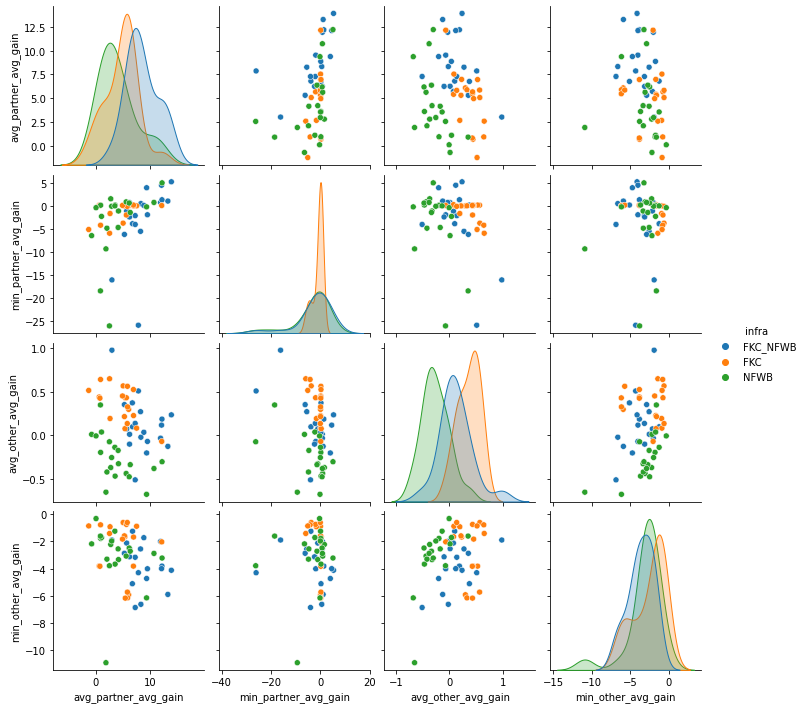

In [238]:
sns.pairplot(objs, vars=['avg_partner_avg_gain', 'min_partner_avg_gain', 'avg_other_avg_gain', 'min_other_avg_gain'], hue='infra')

In [239]:
objs['sat1'] = [1 if s > 0.0 else 0 for s in objs['avg_partner_avg_gain']]
objs['sat2'] = [1 if s > 0.0 else 0 for s in objs['min_partner_avg_gain']]
objs['sat3'] = [1 if s > 0.0 else 0 for s in objs['avg_other_avg_gain']]
objs['sat4'] = [1 if s > 0.0 else 0 for s in objs['min_other_avg_gain']]
objs['satsum'] = objs['sat1'] + objs['sat2'] + objs['sat3'] + objs['sat4']
objs['satsum']

0     2
1     2
2     1
3     3
4     2
5     2
6     3
7     2
8     2
9     2
10    3
11    2
12    2
13    2
14    1
15    2
16    3
17    1
18    3
19    3
20    3
21    2
22    3
23    3
24    3
25    2
26    3
27    3
28    2
29    2
30    3
31    2
32    2
33    3
34    2
35    1
36    3
37    3
38    3
39    3
40    1
41    2
42    1
43    2
44    2
45    2
46    2
47    2
48    1
49    2
50    2
51    1
52    1
53    1
54    1
55    2
56    1
57    1
58    2
59    2
Name: satsum, dtype: int64

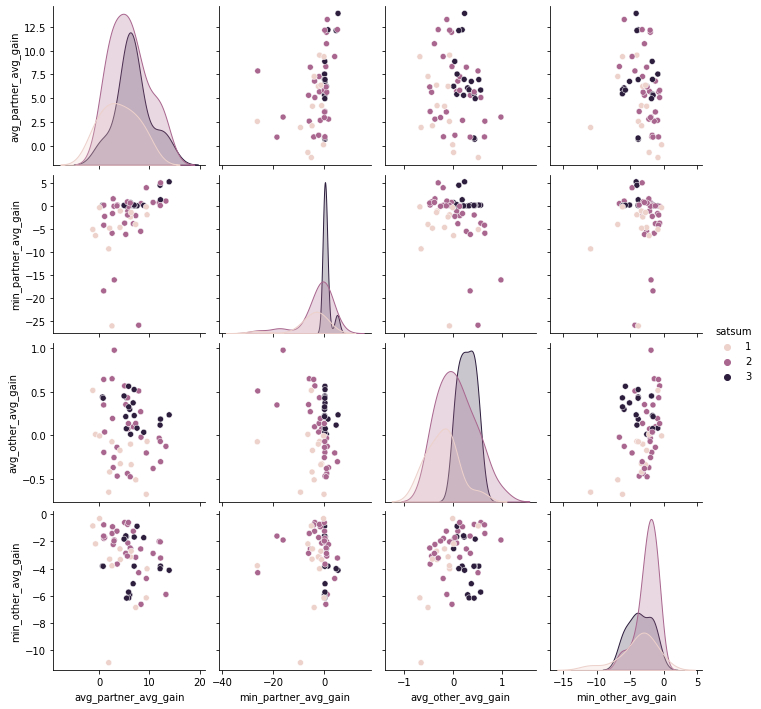

In [240]:
sns.pairplot(objs, vars=['avg_partner_avg_gain', 'min_partner_avg_gain', 'avg_other_avg_gain', 'min_other_avg_gain'], hue='satsum')

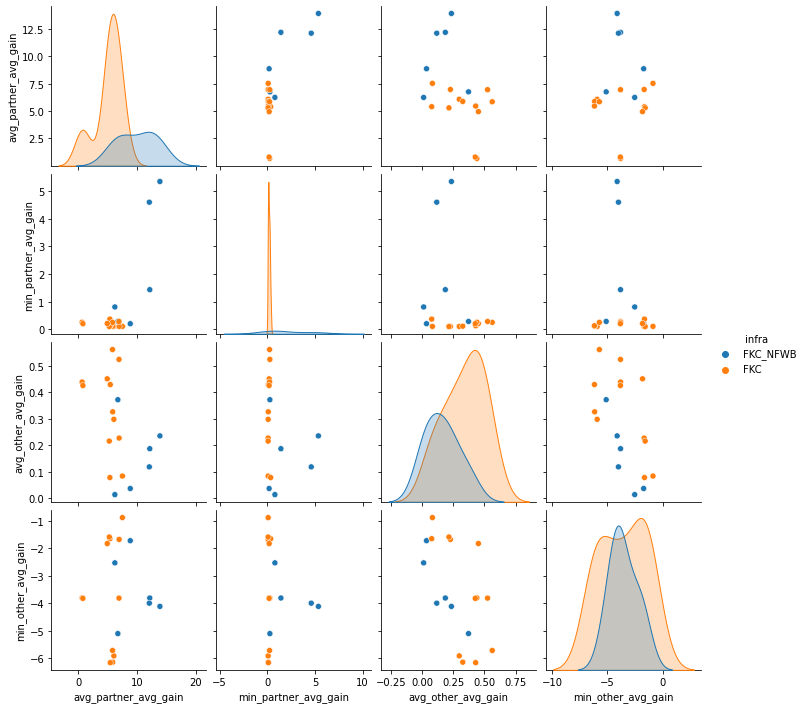

In [241]:
sns.pairplot(objs.loc[objs['satsum'] > 2, :], vars=['avg_partner_avg_gain', 'min_partner_avg_gain', 'avg_other_avg_gain', 'min_other_avg_gain'], hue='infra')

In [250]:
### fairness of benefits relative to shares (NOTE: added 10 to all to avoid negativity issues)
gini = []
for i in range(objs.shape[0]):
    s = objs.scenario[i]
    total_gain = (objs.avg_partner_avg_gain[i]+10) * objs.num_partners[i]
    diff_gains = []
    for k in districts[s]:
        try:
            if shares[s][k] > 0.0:
                diff_gains.append((objs_districts[s][k]['exp_gain']+10) / (total_gain * shares[s][k]) )
        except:
            pass
    # calculate gini coefficient of relative benefits
    gini.append(0)
    for j in range(len(diff_gains)):
        for l in range(len(diff_gains)):
            gini[-1] += abs(diff_gains[j] - diff_gains[l])
    gini[-1] /= (2 * len(diff_gains)**2 * sum(diff_gains)/len(diff_gains))
objs['gini'] = gini

<AxesSubplot:xlabel='samp', ylabel='gini'>

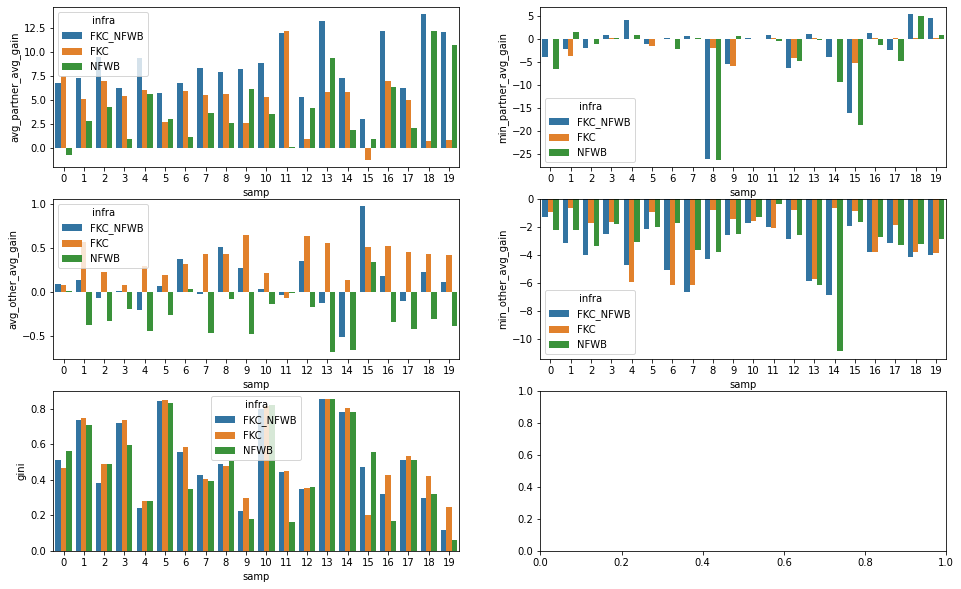

In [251]:
fig, axs = plt.subplots(3,2, figsize=(16,10), gridspec_kw={'wspace':0.2})

sns.barplot(data=objs, x='samp', y='avg_partner_avg_gain', hue='infra', ax=axs[0,0])
sns.barplot(data=objs, x='samp', y='min_partner_avg_gain', hue='infra', ax=axs[0,1])
sns.barplot(data=objs, x='samp', y='avg_other_avg_gain', hue='infra', ax=axs[1,0])
sns.barplot(data=objs, x='samp', y='min_other_avg_gain', hue='infra', ax=axs[1,1])
sns.barplot(data=objs, x='samp', y='gini', hue='infra', ax=axs[2,0])

In [294]:
### alternative gini-like measure & plot, based on ordering ownership share vs benefits
def scatter_gini(i, ax):
    s = objs.scenario[i]
    if objs.infra[i] == 'FKC_NFWB':
        cmap = 'Blues'
    elif objs.infra[i] == 'FKC':
        cmap = 'Greens'
    elif objs.infra[i] == 'NFWB':
        cmap = 'Oranges'
    else:
        print(s, i)
    color = cm.get_cmap(cmap)(0.8) #((objs['samp'][i] % 20) / 19)
    
    total_gain = (objs.avg_partner_avg_gain[i]) * objs.num_partners[i]
    gains = []
    ds = []
    owns = []
    for k in districts[s]:
        try:
            if shares[s][k] > 0.0:
                gains.append(objs_districts[s][k]['exp_gain'])
                ds.append(k)
                owns.append(shares[s][k])
        except:
            pass
    ginidf = pd.DataFrame({'district': ds, 'share': owns, 'gain': gains})
    ginidf['sharegain'] = total_gain * ginidf['share']
    ginidf['gain/sharegain'] = ginidf['gain'] / ginidf['sharegain']
    ginidf.sort_values('gain/sharegain', inplace=True)
    ginidf['cumsharegain'] = ginidf['sharegain'].cumsum()
    ginidf['cumgain'] = ginidf['gain'].cumsum()
    ginidf['fraccumsharegain'] = ginidf['cumsharegain'] / ginidf['cumsharegain'].max()
    ginidf['fraccumgain'] = ginidf['cumgain'] / ginidf['cumgain'].max()
    ginidf = pd.concat([pd.DataFrame({'fraccumsharegain':[0], 'fraccumgain':[0]}), ginidf]).reset_index(drop=True)
    
    ax.plot(ginidf['fraccumsharegain'], ginidf['fraccumgain'], c=color, alpha=0.6, marker='o')
    ax.plot([0,1],[0,1],c='k',ls=':')
    ax.set_xlabel('Cumulative ownership')
    ax.set_ylabel('Cumulative benefit')

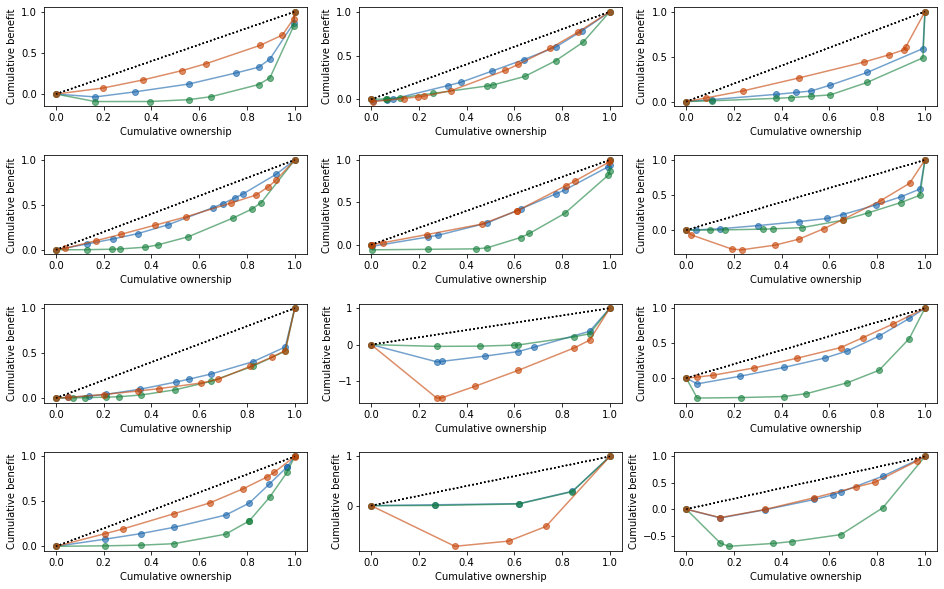

In [295]:
fig, axs = plt.subplots(4,3, figsize=(16,10), gridspec_kw={'wspace':0.2, 'hspace':0.5})

samp = 1
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[0,0])
# axs[0,0].set_title('Sample ' + str(samp))

samp = 2
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[0,1])
# axs[0,1].set_title('Sample ' + str(samp))

samp = 3
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[0,2])
# axs[0,2].set_title('Sample ' + str(samp))

samp = 4
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[1,0])
# axs[1,0].set_title('Sample ' + str(samp))

samp = 5
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[1,1])
# axs[1,1].set_title('Sample ' + str(samp))

samp = 6
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[1,2])
# axs[1,2].set_title('Sample ' + str(samp))

samp = 7
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[2,0])
# axs[2,0].set_title('Sample ' + str(samp))

samp = 8
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[2,1])
# axs[2,1].set_title('Sample ' + str(samp))

samp = 9
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[2,2])
# axs[2,2].set_title('Sample ' + str(samp))

samp = 10
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[3,0])
# axs[3,0].set_title('Sample ' + str(samp))

samp = 11
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[3,1])
# axs[3,1].set_title('Sample ' + str(samp))

samp = 12
for i in [samp, samp+20, samp+40]:
    scatter_gini(i, axs[3,2])
# axs[3,2].set_title('Sample ' + str(samp))
    


In [291]:
shares[scenarios[41]]

{'FRS': 0.0,
 'COF': 0.0,
 'OFK': 0.0,
 'TUL': 0.0,
 'KWD': 0.13289529221403246,
 'OKW': 0.0,
 'EXE': 0.0,
 'LDS': 0.0,
 'LND': 0.0,
 'PRT': 0.0,
 'LWT': 0.0,
 'OTL': 0.16590782170002646,
 'TPD': 0.17818858196571732,
 'SAU': 0.0,
 'TBA': 0.022283136474961402,
 'OXV': 0.0,
 'PIX': 0.0,
 'DLE': 0.0,
 'KRT': 0.0,
 'SSJ': 0.0,
 'SFW': 0.30698051989492053,
 'NKN': 0.0,
 'ARV': 0.0,
 'DLR': 0.0,
 'KCWA': 0.0,
 'ID4': 0.0,
 'SMI': 0.0,
 'TJC': 0.0,
 'BLR': 0.0,
 'LHL': 0.0,
 'BDM': 0.0,
 'WRM': 0.0,
 'SOC': 0.0,
 'COB': 0.0,
 'BVA': 0.0,
 'CWO': 0.1937446477503419,
 'HML': 0.0,
 'KND': 0.0,
 'RRB': 0.0,
 'SOB': 0.0,
 'CCA': 0.0}